# Análisis Estadístico - Evolución de Calidad de Código en Estudiantes de Programación Aplicada

**Investigador:** Enel Almonte  
**Institución:** Universidad Católica Nordestana (UCNE)  
**Tesis:** "Análisis de la Evolución de la Calidad del Código en Estudiantes de Programación Aplicada mediante Métricas de SonarCloud"

## Contexto de la Investigación

### Objetivo General
Analizar la evolución de la calidad del código fuente desarrollado por estudiantes de Ingeniería en Sistemas de la UCNE al comparar los proyectos finales de la asignatura Programación Aplicada I y Programación Aplicada II.

### Pregunta de Investigación
¿Cómo evoluciona la calidad del código fuente producido por estudiantes de Ingeniería en Sistemas de la UCNE al transitar de Programación Aplicada I a Programación Aplicada II?

### Hipótesis
- **H₀**: No existe diferencia estadísticamente significativa en las métricas de calidad del código entre AP1 y AP2
- **H₁**: Existe mejora estadísticamente significativa en las métricas de calidad del código de AP1 a AP2

### Variables
- **Variable Independiente**: Intervención pedagógica (taller "Código Limpio" en AP2)
- **Variable Dependiente**: Métricas de calidad del código de SonarCloud

---

## Metodología Estadística
- **Diseño**: Pre-test/Post-test pareado
- **Nivel de significancia**: α = 0.05
- **Corrección**: FDR para comparaciones múltiples
- **Tamaño del efecto**: Cohen's d para interpretación práctica

# 1. Data Loading and Setup
## Importación de Librerías Necesarias

In [4]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, wilcoxon, ttest_rel, normaltest
from statsmodels.stats.multitest import multipletests
import warnings
warnings.filterwarnings('ignore')

# Configurar visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Librerías importadas correctamente")
print("📊 Configuración de visualizaciones lista")

✅ Librerías importadas correctamente
📊 Configuración de visualizaciones lista


In [5]:
# Cargar datos desde URL
url = 'https://raw.githubusercontent.com/TesisEnel/Recopilacion_Datos_CalidadCodigo/main/data/Estudiantes_2023-2024_con_metricas_sonarcloud.csv'

try:
    df = pd.read_csv(url)
    print("✅ Datos cargados exitosamente")
    print(f"📊 Dimensiones del dataset: {df.shape}")
    print(f"👥 Número de estudiantes únicos: {df['Id'].nunique()}")
except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")
    print("🔄 Intentando cargar desde archivo local...")
    try:
        df = pd.read_csv('../data/Estudiantes_2023-2024_con_metricas_sonarcloud.csv')
        print("✅ Datos cargados desde archivo local")
    except:
        print("❌ No se pudieron cargar los datos")

✅ Datos cargados exitosamente
📊 Dimensiones del dataset: (60, 41)
👥 Número de estudiantes únicos: 60


# 2. Exploratory Data Analysis (EDA)
## Análisis Exploratorio de Datos

In [6]:
# Estructura básica del dataset
print("=== ESTRUCTURA DEL DATASET ===")
print(f"Dimensiones: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print("\n=== INFORMACIÓN BÁSICA ===")
print(df.info())
print("\n=== PRIMERAS FILAS ===")
display(df.head())

=== ESTRUCTURA DEL DATASET ===
Dimensiones: (60, 41)
Columnas: ['Id', 'Semestre', 'Estudiante', 'Sexo', 'Email', 'Original_Repo_Ap1', 'Original_Repo_Ap2', 'Sonar_Ap1', 'Sonar_Ap2', 'Sonar_Repo_Ap1', 'Sonar_Repo_Ap2', 'bugs_AP1', 'vulnerabilities_AP1', 'security_hotspots_AP1', 'code_smells_AP1', 'technical_debt_AP1', 'sqale_rating_AP1', 'complexity_AP1', 'cognitive_complexity_AP1', 'coverage_AP1', 'comment_lines_density_AP1', 'duplicated_lines_density_AP1', 'ncloc_AP1', 'reliability_rating_AP1', 'security_rating_AP1', 'open_issues_AP1', 'bugs_AP2', 'vulnerabilities_AP2', 'security_hotspots_AP2', 'code_smells_AP2', 'technical_debt_AP2', 'sqale_rating_AP2', 'complexity_AP2', 'cognitive_complexity_AP2', 'coverage_AP2', 'comment_lines_density_AP2', 'duplicated_lines_density_AP2', 'ncloc_AP2', 'reliability_rating_AP2', 'security_rating_AP2', 'open_issues_AP2']

=== INFORMACIÓN BÁSICA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 41 columns):
 #

,Id,Semestre,Estudiante,Sexo,Email,Original_Repo_Ap1,Original_Repo_Ap2,Sonar_Ap1,Sonar_Ap2,Sonar_Repo_Ap1,...,sqale_rating_AP2,complexity_AP2,cognitive_complexity_AP2,coverage_AP2,comment_lines_density_AP2,duplicated_lines_density_AP2,ncloc_AP2,reliability_rating_AP2,security_rating_AP2,open_issues_AP2
0,1,2024-01,Aaron Eliezer Hernández García,1,atminifg655@gmail.com,https://github.com/aaron-developer25/SwiftPay.git,https://github.com/aaron-developer25/DealerPOS...,TesisEnel_SwiftPay-Aaron-Ap1,TesisEnel_DealerPOS-Aaron-ap2,https://github.com/TesisEnel/SwiftPay-Aaron-Ap1,...,1.0,1029,1262,NaN,1.0,3.9,14674,3.0,3.0,241
1,2,2023-03,Abraham El Hage Jreij,1,abrahamelhage2003@gmail.com,https://github.com/JPichardo2003/AguaMariaSolu...,https://github.com/A-EHJ/Final_Project_Ap2.git,TesisEnel_AguaMariaSolution-JulioPichardo-ap1,TesisEnel_Final_Project-Abraham-ap2,https://github.com/TesisEnel/AguaMariaSolution...,...,1.0,272,193,NaN,1.2,9.2,4075,1.0,1.0,37
2,3,2024-02,Adiel Luis García Rosa,1,adiel.garcia0422@gmail.com,https://github.com/SamyJp23/PeakPerformance.git,https://github.com/Adiel040/GymProApp.git,TesisEnel_PeakPerformance-samuelAntonio-ap1,TesisEnel_GymProApp-AdielGarcia-Ap2,https://github.com/TesisEnel/PeakPerformance-s...,...,1.0,375,546,NaN,1.5,0.8,5736,1.0,1.0,40
3,4,2024-03,Alaina Garcia Salazar,2,garciaalaina01@gmail.com,https://github.com/Reyx38/ReyAI_Transport.git,https://github.com/JeronyCruz/RecreArte.git,TesisEnel_ReyAI_Transport-Reyfil-Ap1,TesisEnel_RecreArte-JeronyCruz-Ap2,https://github.com/TesisEnel/ReyAI_Transport-R...,...,1.0,900,1038,NaN,2.8,12.3,11268,1.0,1.0,116
4,5,2023-01,Albert Luis Delgado Maria,1,bolshoi19booze@gmail.com,https://github.com/Rhazerpk/ProyectoFinal-AP1,https://github.com/Rhazerpk/MoonlightBarApp,TesisEnel_ProyectoFinal-AlbertRegalado-ap1,TesisEnel_MoonlightBarApp-AlbetDelgado-ap2,https://github.com/TesisEnel/ProyectoFinal-Alb...,...,1.0,99,172,NaN,1.5,10.7,2781,1.0,1.0,28


In [7]:
# Paso de limpieza: eliminar columnas no necesarias
columns_to_remove = [
    'Estudiante', 
    'Email', 
    'Original_Repo_Ap1', 
    'Original_Repo_Ap2', 
    'Sonar_Ap1', 
    'Sonar_Ap2', 
    'Sonar_Repo_Ap1', 
    'Sonar_Repo_Ap2'
]

# Remover columnas si existen en el DataFrame
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

print(f"✅ Columnas eliminadas: {[col for col in columns_to_remove if col in df.columns]}")
print(f"📊 Columnas restantes: {list(df.columns)}")

# Identificar métricas AP1 y AP2 para análisis posterior
all_metrics_ap1 = [col for col in df.columns if col.endswith('_AP1')]
all_metrics_ap2 = [col for col in df.columns if col.endswith('_AP2')]

# Identificar columna de ID de estudiante
student_id_col = 'Id' if 'Id' in df.columns else None
if student_id_col is None:
    # Buscar otras posibles columnas de ID
    id_candidates = [col for col in df.columns if 'id' in col.lower() or 'estudiante' in col.lower()]
    student_id_col = id_candidates[0] if id_candidates else None

print(f"📊 Métricas AP1 encontradas: {len(all_metrics_ap1)}")
print(f"📊 Métricas AP2 encontradas: {len(all_metrics_ap2)}")
print(f"👥 Columna de ID de estudiante: {student_id_col}")

✅ Columnas eliminadas: []
📊 Columnas restantes: ['Id', 'Semestre', 'Sexo', 'bugs_AP1', 'vulnerabilities_AP1', 'security_hotspots_AP1', 'code_smells_AP1', 'technical_debt_AP1', 'sqale_rating_AP1', 'complexity_AP1', 'cognitive_complexity_AP1', 'coverage_AP1', 'comment_lines_density_AP1', 'duplicated_lines_density_AP1', 'ncloc_AP1', 'reliability_rating_AP1', 'security_rating_AP1', 'open_issues_AP1', 'bugs_AP2', 'vulnerabilities_AP2', 'security_hotspots_AP2', 'code_smells_AP2', 'technical_debt_AP2', 'sqale_rating_AP2', 'complexity_AP2', 'cognitive_complexity_AP2', 'coverage_AP2', 'comment_lines_density_AP2', 'duplicated_lines_density_AP2', 'ncloc_AP2', 'reliability_rating_AP2', 'security_rating_AP2', 'open_issues_AP2']
📊 Métricas AP1 encontradas: 15
📊 Métricas AP2 encontradas: 15
👥 Columna de ID de estudiante: Id


In [10]:
# Identificar todas las métricas comparables (AP1 vs AP2)
print("=== IDENTIFICACIÓN DE MÉTRICAS COMPARABLES ===")

# Extraer nombres base de las métricas (sin sufijo _AP1 o _AP2)
base_all_metrics = []
for col in df.columns:
    if col.endswith('_AP1'):
        base_metric = col.replace('_AP1', '')
        # Verificar que existe la correspondiente métrica AP2
        if f"{base_metric}_AP2" in df.columns:
            base_all_metrics.append(base_metric)

print(f"✅ Total métricas comparables encontradas: {len(base_all_metrics)}")
print(f"  Todas las métricas son válidas para análisis pareado AP1 vs AP2")

# Definir dimensiones de calidad para análisis
quality_dimensions = {
    'Mantenibilidad': ['technical_debt', 'code_smells', 'duplicated_lines_density', 'cognitive_complexity'],
    'Fiabilidad': ['bugs', 'reliability_rating'],
    'Seguridad': ['vulnerabilities', 'security_rating'],
    'Complejidad': ['complexity', 'cyclomatic_complexity'],
    'Tamaño': ['ncloc', 'lines', 'statements'],
    'Documentación': ['comment_lines_density', 'comment_lines']
}

# Métricas prioritarias para análisis rápido
priority_metrics = [
    'technical_debt', 'code_smells', 'duplicated_lines_density', 'cognitive_complexity',
    'bugs', 'reliability_rating', 'vulnerabilities', 'security_rating',
    'complexity', 'ncloc', 'comment_lines_density'
]

# Filtrar métricas prioritarias disponibles
available_priority_metrics = [m for m in priority_metrics if m in base_all_metrics]

print(f"🎯 Métricas prioritarias disponibles: {len(available_priority_metrics)}")

# Configuración para el análisis
USE_PRIORITY_ONLY = True  # Cambiar a False para analizar TODAS las métricas

if USE_PRIORITY_ONLY:
    selected_metrics = available_priority_metrics
    analysis_type = "PRIORITARIAS"
else:
    selected_metrics = base_all_metrics
    analysis_type = "TODAS"

print(f"\n🎯 CONFIGURACIÓN DE ANÁLISIS:")
print(f"   📋 Tipo: {analysis_type}")
print(f"   📊 Métricas a analizar: {len(selected_metrics)}")

# Mostrar lista de métricas seleccionadas
print(f"\n📋 MÉTRICAS SELECCIONADAS:")
for i, metric in enumerate(selected_metrics, 1):
    print(f"   {i:2d}. {metric}")

# Variables globales para celdas posteriores
globals()['base_all_metrics'] = base_all_metrics
globals()['available_base_metrics'] = base_all_metrics
globals()['base_metrics'] = quality_dimensions
globals()['SELECTED_METRICS_FOR_ANALYSIS'] = selected_metrics
globals()['ANALYSIS_TYPE'] = analysis_type

print(f"\n✅ Configuración completada - Listo para análisis estadístico")

=== IDENTIFICACIÓN DE MÉTRICAS COMPARABLES ===
✅ Total métricas comparables encontradas: 15
  Todas las métricas son válidas para análisis pareado AP1 vs AP2
🎯 Métricas prioritarias disponibles: 11

🎯 CONFIGURACIÓN DE ANÁLISIS:
   📋 Tipo: PRIORITARIAS
   📊 Métricas a analizar: 11

📋 MÉTRICAS SELECCIONADAS:
    1. technical_debt
    2. code_smells
    3. duplicated_lines_density
    4. cognitive_complexity
    5. bugs
    6. reliability_rating
    7. vulnerabilities
    8. security_rating
    9. complexity
   10. ncloc
   11. comment_lines_density

✅ Configuración completada - Listo para análisis estadístico


In [11]:
# Estadísticas descriptivas por asignatura
print("=== ESTADÍSTICAS DESCRIPTIVAS POR ASIGNATURA ===")

# Filtrar métricas disponibles para cada asignatura
available_metrics_ap1 = [m for m in all_metrics_ap1 if m in df.columns]
available_metrics_ap2 = [m for m in all_metrics_ap2 if m in df.columns]

print(f"\n📚 ASIGNATURA AP1:")
print(f"👥 Número de estudiantes: {len(df)}")
print(f"📊 Métricas disponibles: {len(available_metrics_ap1)}")

if available_metrics_ap1:
    # Estadísticas de las métricas AP1
    stats_ap1 = df[available_metrics_ap1].describe()
    print("\n📈 Estadísticas descriptivas AP1:")
    display(stats_ap1.round(3))

print(f"\n📚 ASIGNATURA AP2:")
print(f"👥 Número de estudiantes: {len(df)}")
print(f"📊 Métricas disponibles: {len(available_metrics_ap2)}")

if available_metrics_ap2:
    # Estadísticas de las métricas AP2
    stats_ap2 = df[available_metrics_ap2].describe()
    print("\n📈 Estadísticas descriptivas AP2:")
    display(stats_ap2.round(3))

# Comparación directa AP1 vs AP2 para métricas base
print("\n=== COMPARACIÓN DIRECTA AP1 vs AP2 ===")
print(f"🔄 Procesando {len(base_all_metrics)} métricas...", flush=True)

comparison_data = []
for idx, metric in enumerate(base_all_metrics, 1):
    ap1_col = f"{metric}_AP1"
    ap2_col = f"{metric}_AP2"
    
    # Mostrar progreso en tiempo real
    print(f"📈 [{idx:2d}/{len(base_all_metrics)}] Comparando métrica: {metric}", flush=True)
    
    if ap1_col in df.columns and ap2_col in df.columns:
        comparison_data.append({
            'Métrica': metric,
            'AP1_Media': df[ap1_col].mean(),
            'AP1_Mediana': df[ap1_col].median(),
            'AP1_Std': df[ap1_col].std(),
            'AP2_Media': df[ap2_col].mean(),
            'AP2_Mediana': df[ap2_col].median(),
            'AP2_Std': df[ap2_col].std(),
            'Diferencia_Media': df[ap2_col].mean() - df[ap1_col].mean(),
            'Cambio_Porcentual': ((df[ap2_col].mean() - df[ap1_col].mean()) / df[ap1_col].mean() * 100) if df[ap1_col].mean() != 0 else 0
        })
        print(f"   ✅ Procesada correctamente", flush=True)
    else:
        print(f"   ❌ Columnas no encontradas", flush=True)

print(f"\n✅ Procesamiento completado!", flush=True)

if comparison_data:
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.round(3)
    display(comparison_df)
    
    print(f"\n📊 Métricas comparables encontradas: {len(comparison_data)}")
else:
    print("\n❌ No se encontraron métricas comparables entre AP1 y AP2")

=== ESTADÍSTICAS DESCRIPTIVAS POR ASIGNATURA ===

📚 ASIGNATURA AP1:
👥 Número de estudiantes: 60
📊 Métricas disponibles: 15

📈 Estadísticas descriptivas AP1:


,bugs_AP1,vulnerabilities_AP1,security_hotspots_AP1,code_smells_AP1,technical_debt_AP1,sqale_rating_AP1,complexity_AP1,cognitive_complexity_AP1,coverage_AP1,comment_lines_density_AP1,duplicated_lines_density_AP1,ncloc_AP1,reliability_rating_AP1,security_rating_AP1,open_issues_AP1
count,60.000,60.000,60.000,60.000,0.0,60.0,60.000,60.000,13.0,60.000,60.000,60.000,60.000,60.000,60.000
mean,4.200,0.550,1.533,56.850,NaN,1.0,456.783,139.033,0.0,3.443,1.623,3499.767,2.267,2.933,61.600
std,6.969,0.622,1.761,56.184,NaN,0.0,343.142,206.947,0.0,2.283,2.936,2442.880,1.313,2.016,59.727
min,0.000,0.000,0.000,13.000,NaN,1.0,49.000,15.000,0.0,0.100,0.000,1056.000,1.000,1.000,16.000
25%,0.000,0.000,1.000,27.750,NaN,1.0,259.250,42.000,0.0,1.950,0.250,2068.000,1.000,1.000,28.750
50%,1.000,0.000,1.000,40.000,NaN,1.0,328.500,66.000,0.0,2.900,1.000,2558.500,3.000,1.000,45.000
75%,6.500,1.000,1.250,55.000,NaN,1.0,538.000,112.500,0.0,4.625,1.925,4257.000,3.000,5.000,61.000
max,31.000,2.000,7.000,263.000,NaN,1.0,1735.000,1069.000,0.0,10.100,16.300,14137.000,5.000,5.000,285.000



📚 ASIGNATURA AP2:
👥 Número de estudiantes: 60
📊 Métricas disponibles: 15

📈 Estadísticas descriptivas AP2:


,bugs_AP2,vulnerabilities_AP2,security_hotspots_AP2,code_smells_AP2,technical_debt_AP2,sqale_rating_AP2,complexity_AP2,cognitive_complexity_AP2,coverage_AP2,comment_lines_density_AP2,duplicated_lines_density_AP2,ncloc_AP2,reliability_rating_AP2,security_rating_AP2,open_issues_AP2
count,60.00,60.000,60.000,60.000,0.0,60.0,60.000,60.000,1.0,60.000,60.000,60.000,60.000,60.000,60.000
mean,0.20,0.083,1.450,67.050,NaN,1.0,371.067,413.933,0.0,2.598,6.735,6134.283,1.167,1.233,67.333
std,0.86,0.279,0.594,59.953,NaN,0.0,313.649,375.866,NaN,2.965,7.920,4533.324,0.557,0.831,60.248
min,0.00,0.000,1.000,3.000,NaN,1.0,9.000,4.000,0.0,0.400,0.000,369.000,1.000,1.000,3.000
25%,0.00,0.000,1.000,28.000,NaN,1.0,104.250,139.250,0.0,1.150,1.400,2387.000,1.000,1.000,28.000
50%,0.00,0.000,1.000,43.000,NaN,1.0,252.000,253.000,0.0,1.700,3.950,4456.000,1.000,1.000,43.000
75%,0.00,0.000,2.000,78.750,NaN,1.0,624.250,628.000,0.0,2.925,8.900,9290.000,1.000,1.000,79.500
max,6.00,1.000,4.000,271.000,NaN,1.0,1029.000,1411.000,0.0,18.900,35.600,17130.000,3.000,5.000,271.000



=== COMPARACIÓN DIRECTA AP1 vs AP2 ===
🔄 Procesando 15 métricas...
📈 [ 1/15] Comparando métrica: bugs
   ✅ Procesada correctamente
📈 [ 2/15] Comparando métrica: vulnerabilities
   ✅ Procesada correctamente
📈 [ 3/15] Comparando métrica: security_hotspots
   ✅ Procesada correctamente
📈 [ 4/15] Comparando métrica: code_smells
   ✅ Procesada correctamente
📈 [ 5/15] Comparando métrica: technical_debt
   ✅ Procesada correctamente
📈 [ 6/15] Comparando métrica: sqale_rating
   ✅ Procesada correctamente
📈 [ 7/15] Comparando métrica: complexity
   ✅ Procesada correctamente
📈 [ 1/15] Comparando métrica: bugs
   ✅ Procesada correctamente
📈 [ 2/15] Comparando métrica: vulnerabilities
   ✅ Procesada correctamente
📈 [ 3/15] Comparando métrica: security_hotspots
   ✅ Procesada correctamente
📈 [ 4/15] Comparando métrica: code_smells
   ✅ Procesada correctamente
📈 [ 5/15] Comparando métrica: technical_debt
   ✅ Procesada correctamente
📈 [ 6/15] Comparando métrica: sqale_rating
   ✅ Procesada correctame

,Métrica,AP1_Media,AP1_Mediana,AP1_Std,AP2_Media,AP2_Mediana,AP2_Std,Diferencia_Media,Cambio_Porcentual
0,bugs,4.200,1.0,6.969,0.200,0.00,0.860,-4.000,-95.238
1,vulnerabilities,0.550,0.0,0.622,0.083,0.00,0.279,-0.467,-84.848
2,security_hotspots,1.533,1.0,1.761,1.450,1.00,0.594,-0.083,-5.435
3,code_smells,56.850,40.0,56.184,67.050,43.00,59.953,10.200,17.942
4,technical_debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,sqale_rating,1.000,1.0,0.000,1.000,1.00,0.000,0.000,0.000
6,complexity,456.783,328.5,343.142,371.067,252.00,313.649,-85.717,-18.765
7,cognitive_complexity,139.033,66.0,206.947,413.933,253.00,375.866,274.900,197.722
8,coverage,0.000,0.0,0.000,0.000,0.00,NaN,0.000,0.000
9,comment_lines_density,3.443,2.9,2.283,2.598,1.70,2.965,-0.845,-24.540



📊 Métricas comparables encontradas: 15


# 3. Data Preprocessing and Validation
## Preprocesamiento y Validación de Datos

In [14]:
# Validar datos pareados
print("=== VALIDACIÓN DE DATOS PAREADOS ===")

if student_id_col:
    # En este formato, cada fila ya contiene datos de AP1 y AP2 para el mismo estudiante
    total_students = len(df)
    print(f"👥 Total de estudiantes en el dataset: {total_students}")
    
    # Verificar que tenemos datos para ambas asignaturas
    students_with_ap1 = df[available_metrics_ap1].notna().any(axis=1).sum()
    students_with_ap2 = df[available_metrics_ap2].notna().any(axis=1).sum()
    
    print(f"👥 Estudiantes con datos en AP1: {students_with_ap1}")
    print(f"👥 Estudiantes con datos en AP2: {students_with_ap2}")
    
    # Estudiantes con datos en ambas asignaturas
    has_ap1_data = df[available_metrics_ap1].notna().any(axis=1)
    has_ap2_data = df[available_metrics_ap2].notna().any(axis=1)
    paired_mask = has_ap1_data & has_ap2_data
    
    paired_students_count = paired_mask.sum()
    print(f"🔗 Estudiantes con datos pareados (AP1 y AP2): {paired_students_count}")
    
    # Filtrar datos para análisis pareado
    df_paired = df[paired_mask].copy()
    print(f"\n📊 Dataset pareado final: {df_paired.shape}")
    print(f"✅ Datos listos para análisis pre-post intervención")
    
    # Información adicional del dataset
    if 'Sexo' in df_paired.columns:
        print(f"\n👥 Distribución por género:")
        gender_dist = df_paired['Sexo'].value_counts()
        display(gender_dist)
    
    if 'Semestre' in df_paired.columns:
        print(f"\n  Distribución por semestre:")
        semester_dist = df_paired['Semestre'].value_counts()
        display(semester_dist)
        
else:
    print("❌ No se puede realizar validación sin columna de identificación de estudiante")
    df_paired = df.copy()  # Usar todo el dataset como fallback

=== VALIDACIÓN DE DATOS PAREADOS ===
👥 Total de estudiantes en el dataset: 60
👥 Estudiantes con datos en AP1: 60
👥 Estudiantes con datos en AP2: 60
🔗 Estudiantes con datos pareados (AP1 y AP2): 60

📊 Dataset pareado final: (60, 33)
✅ Datos listos para análisis pre-post intervención

👥 Distribución por género:


Sexo
1    52
2     8
Name: count, dtype: int64


  Distribución por semestre:


Semestre
2024-01    13
2024-03    12
2023-01    11
2023-03    10
2024-02     8
2023-02     6
Name: count, dtype: int64

In [15]:
# Análisis de valores faltantes y outliers
print("=== ANÁLISIS DE VALORES FALTANTES ===")

# Analizar valores faltantes para AP1 y AP2 por separado
all_available_metrics = available_metrics_ap1 + available_metrics_ap2

missing_data = df_paired[all_available_metrics].isnull().sum()
missing_percentage = (missing_data / len(df_paired)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage.round(2)
})

# Separar por asignatura para mejor visualización
missing_ap1 = missing_df[missing_df.index.str.contains('_AP1')]
missing_ap2 = missing_df[missing_df.index.str.contains('_AP2')]

print("Valores faltantes AP1:")
display(missing_ap1[missing_ap1['Missing Count'] > 0])

print("Valores faltantes AP2:")
display(missing_ap2[missing_ap2['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✅ No hay valores faltantes en las métricas principales")

# Detección de outliers usando IQR
print("\n=== DETECCIÓN DE OUTLIERS (IQR) ===")

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outlier_summary = []
for metric in all_available_metrics:
    if df_paired[metric].dtype in ['int64', 'float64']:
        n_outliers, lower, upper = detect_outliers_iqr(df_paired, metric)
        outlier_summary.append({
            'Metric': metric,
            'Outliers': n_outliers,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Outlier %': (n_outliers / len(df_paired)) * 100
        })

outlier_df = pd.DataFrame(outlier_summary)
print(f"📊 Resumen de outliers (primeras 10 métricas):")
display(outlier_df.head(10).round(3))

# Resumen general de outliers
high_outlier_metrics = outlier_df[outlier_df['Outlier %'] > 10]
if len(high_outlier_metrics) > 0:
    print(f"\n⚠️ Métricas con alto porcentaje de outliers (>10%):")
    display(high_outlier_metrics[['Metric', 'Outlier %']].round(1))
else:
    print(f"\n✅ No hay métricas con porcentajes extremos de outliers")

=== ANÁLISIS DE VALORES FALTANTES ===
Valores faltantes AP1:


,Missing Count,Missing Percentage
technical_debt_AP1,60,100.00
coverage_AP1,47,78.33


Valores faltantes AP2:


,Missing Count,Missing Percentage
technical_debt_AP2,60,100.00
coverage_AP2,59,98.33



=== DETECCIÓN DE OUTLIERS (IQR) ===
📊 Resumen de outliers (primeras 10 métricas):


,Metric,Outliers,Lower Bound,Upper Bound,Outlier %
0,bugs_AP1,3,-9.750,16.250,5.000
1,vulnerabilities_AP1,0,-1.500,2.500,0.000
2,security_hotspots_AP1,29,0.625,1.625,48.333
3,code_smells_AP1,6,-13.125,95.875,10.000
4,technical_debt_AP1,0,NaN,NaN,0.000
5,sqale_rating_AP1,0,1.000,1.000,0.000
6,complexity_AP1,4,-158.875,956.125,6.667
7,cognitive_complexity_AP1,9,-63.750,218.250,15.000
8,coverage_AP1,0,0.000,0.000,0.000
9,comment_lines_density_AP1,2,-2.062,8.638,3.333



⚠️ Métricas con alto porcentaje de outliers (>10%):


,Metric,Outlier %
2,security_hotspots_AP1,48.3
7,cognitive_complexity_AP1,15.0


# 4. Normality Testing and Test Selection
## Pruebas de Normalidad y Selección de Tests Estadísticos

In [16]:
# Verificar configuración de análisis y mostrar resumen
print("=== VERIFICACIÓN DE CONFIGURACIÓN PARA ANÁLISIS ESTADÍSTICO ===")

# Mostrar configuración actual
print(f"📊 Total métricas disponibles: {len(base_all_metrics)}")
print(f"🎯 Métricas prioritarias: {len(available_priority_metrics)}")
print(f"⚙️ Configuración actual: {ANALYSIS_TYPE}")
print(f"📋 Métricas a analizar: {len(SELECTED_METRICS_FOR_ANALYSIS)}")

# Verificar datos pareados
print(f"\n👥 DATOS PAREADOS:")
print(f"   📊 Total estudiantes: {len(df_paired)}")

# Verificar completitud de datos para métricas seleccionadas
print(f"\n🔍 COMPLETITUD DE DATOS:")
for metric in SELECTED_METRICS_FOR_ANALYSIS[:5]:  # Mostrar solo primeras 5
    ap1_col = f"{metric}_AP1"
    ap2_col = f"{metric}_AP2"
    valid_pairs = (~df_paired[ap1_col].isna() & ~df_paired[ap2_col].isna()).sum()
    print(f"   ✅ {metric}: {valid_pairs} pares válidos")

if len(SELECTED_METRICS_FOR_ANALYSIS) > 5:
    print(f"   📝 ... y {len(SELECTED_METRICS_FOR_ANALYSIS) - 5} métricas más")

# Estimación de tiempo
ESTIMATED_TIME_PER_METRIC = 2  # Optimizado
total_time_est = len(SELECTED_METRICS_FOR_ANALYSIS) * ESTIMATED_TIME_PER_METRIC

print(f"\n⏱️ ESTIMACIÓN DE TIEMPO:")
print(f"   � Tiempo estimado: ~{total_time_est//60}m {total_time_est%60}s")

print(f"\n✅ Todo listo para análisis estadístico")
print(f"� Puede proceder con la siguiente celda")

=== VERIFICACIÓN DE CONFIGURACIÓN PARA ANÁLISIS ESTADÍSTICO ===
📊 Total métricas disponibles: 15
🎯 Métricas prioritarias: 11
⚙️ Configuración actual: PRIORITARIAS
📋 Métricas a analizar: 11

👥 DATOS PAREADOS:
   📊 Total estudiantes: 60

🔍 COMPLETITUD DE DATOS:
   ✅ technical_debt: 0 pares válidos
   ✅ code_smells: 60 pares válidos
   ✅ duplicated_lines_density: 60 pares válidos
   ✅ cognitive_complexity: 60 pares válidos
   ✅ bugs: 60 pares válidos
   📝 ... y 6 métricas más

⏱️ ESTIMACIÓN DE TIEMPO:
   � Tiempo estimado: ~0m 22s

✅ Todo listo para análisis estadístico
� Puede proceder con la siguiente celda


In [18]:
def analyze_metric_evolution(df, base_metric, alpha=0.05):
    """
    Analiza la evolución de una métrica entre AP1 y AP2
    
    Parameters:
    df: DataFrame con datos pareados (cada fila contiene AP1 y AP2 del mismo estudiante)
    base_metric: nombre base de la métrica (sin sufijo _AP1 o _AP2)
    alpha: nivel de significancia (default 0.05)
    
    Returns:
    dict: resultados del análisis estadístico
    """
    
    # Construir nombres de columnas
    ap1_col = f"{base_metric}_AP1"
    ap2_col = f"{base_metric}_AP2"
    
    # Verificar que las columnas existan
    if ap1_col not in df.columns or ap2_col not in df.columns:
        return {'error': f'Columnas no encontradas: {ap1_col} o {ap2_col}'}
    
    # Extraer datos, eliminando valores nulos
    valid_mask = df[ap1_col].notna() & df[ap2_col].notna()
    ap1_data = df.loc[valid_mask, ap1_col]
    ap2_data = df.loc[valid_mask, ap2_col]
    
    # Verificar que tenemos datos suficientes
    if len(ap1_data) < 3:
        return {'error': f'Datos insuficientes: solo {len(ap1_data)} pares válidos'}
    
    # Calcular diferencias (AP2 - AP1)
    differences = ap2_data.values - ap1_data.values
    
    # Prueba de normalidad de las diferencias (Shapiro-Wilk)
    try:
        _, p_norm = shapiro(differences)
    except:
        p_norm = 0.01  # Asumir no normal si hay error
    
    # Seleccionar test apropiado basado en normalidad
    if p_norm > alpha:
        # Datos normales: T-test pareado
        try:
            stat, p_val = ttest_rel(ap1_data, ap2_data)
            test_used = 'T-test pareado'
        except:
            stat, p_val = wilcoxon(ap1_data, ap2_data, zero_method='zsplit')
            test_used = 'Wilcoxon signed-rank (fallback)'
    else:
        # Datos no normales: Wilcoxon signed-rank
        try:
            stat, p_val = wilcoxon(ap1_data, ap2_data, zero_method='zsplit')
            test_used = 'Wilcoxon signed-rank'
        except:
            stat, p_val = np.nan, np.nan
            test_used = 'Error en test'
    
    # Calcular tamaño del efecto (Cohen's d)
    pooled_std = np.sqrt(((ap1_data.std()**2 + ap2_data.std()**2) / 2))
    if pooled_std != 0:
        cohen_d = (ap2_data.mean() - ap1_data.mean()) / pooled_std
    else:
        cohen_d = 0
    
    # Interpretar tamaño del efecto
    if abs(cohen_d) < 0.2:
        effect_size = 'Pequeño'
    elif abs(cohen_d) < 0.5:
        effect_size = 'Mediano'
    elif abs(cohen_d) < 0.8:
        effect_size = 'Grande'
    else:
        effect_size = 'Muy grande'
    
    return {
        'metric': base_metric,
        'test': test_used,
        'statistic': stat,
        'p_value': p_val,
        'p_normality': p_norm,
        'is_significant': p_val < alpha if not np.isnan(p_val) else False,
        'cohen_d': cohen_d,
        'effect_size': effect_size,
        'ap1_mean': ap1_data.mean(),
        'ap1_std': ap1_data.std(),
        'ap2_mean': ap2_data.mean(),
        'ap2_std': ap2_data.std(),
        'improvement': ap2_data.mean() - ap1_data.mean(),
        'improvement_pct': ((ap2_data.mean() - ap1_data.mean()) / ap1_data.mean() * 100) if ap1_data.mean() != 0 else 0,
        'n_pairs': len(differences),
        'ap1_col': ap1_col,
        'ap2_col': ap2_col
    }

print("✅ Función analyze_metric_evolution actualizada para el nuevo formato")
print("🔬 Lista para análisis estadístico de métricas individuales")

✅ Función analyze_metric_evolution actualizada para el nuevo formato
🔬 Lista para análisis estadístico de métricas individuales


# 5. Paired Statistical Testing for Individual Metrics
## Análisis Estadístico Pareado para Métricas Individuales

In [19]:
# Análisis estadístico para métricas seleccionadas - VERSIÓN OPTIMIZADA
print("=== ANÁLISIS ESTADÍSTICO INDIVIDUAL DE MÉTRICAS (OPTIMIZADO) ===")

import time
from datetime import datetime

# Importar tqdm para barra de progreso
try:
    from tqdm import tqdm
    use_tqdm = True
    print("✅ tqdm disponible para barras de progreso")
except ImportError:
    print("⚠️ tqdm no disponible, se mostrará progreso manual")
    use_tqdm = False

# Usar métricas seleccionadas de la celda anterior
if 'SELECTED_METRICS_FOR_ANALYSIS' in globals():
    metrics_to_analyze = SELECTED_METRICS_FOR_ANALYSIS
    analysis_type = ANALYSIS_TYPE
else:
    # Fallback: usar métricas prioritarias
    metrics_to_analyze = ['technical_debt', 'code_smells', 'bugs', 'vulnerabilities', 
                         'duplicated_lines_density', 'cognitive_complexity']
    analysis_type = "FALLBACK"

print(f"🎯 Analizando métricas {analysis_type}: {len(metrics_to_analyze)} métricas")
print(f"📋 Lista: {', '.join(metrics_to_analyze[:5])}{'...' if len(metrics_to_analyze) > 5 else ''}")

results_individual = []
start_time = time.time()

# Función ultra-optimizada para análisis rápido
def ultra_quick_analyze_metric(df, base_metric, alpha=0.05):
    """Versión ultra-optimizada del análisis estadístico"""
    try:
        ap1_col = f"{base_metric}_AP1"
        ap2_col = f"{base_metric}_AP2"
        
        # Verificar columnas existen
        if ap1_col not in df.columns or ap2_col not in df.columns:
            return None
            
        # Extraer datos válidos rápidamente
        ap1_data = df[ap1_col].dropna()
        ap2_data = df[ap2_col].dropna()
        
        # Asegurar mismo tamaño (datos pareados)
        min_len = min(len(ap1_data), len(ap2_data))
        if min_len < 3:
            return None
            
        ap1_data = ap1_data.iloc[:min_len]
        ap2_data = ap2_data.iloc[:min_len]
        differences = ap2_data.values - ap1_data.values
        
        # Test estadístico directo (Wilcoxon para mayor robustez)
        try:
            if len(differences) > 5:
                stat, p_val = wilcoxon(ap1_data, ap2_data, zero_method='zsplit')
                test_used = 'Wilcoxon signed-rank'
            else:
                # Para muestras muy pequeñas, usar t-test
                stat, p_val = ttest_rel(ap1_data, ap2_data)
                test_used = 'T-test pareado (n pequeña)'
        except Exception as e:
            return None
        
        # Cohen's d rápido
        mean_diff = ap2_data.mean() - ap1_data.mean()
        pooled_std = np.sqrt((ap1_data.var() + ap2_data.var()) / 2)
        cohen_d = mean_diff / pooled_std if pooled_std > 0 else 0
        
        # Clasificación rápida del tamaño del efecto
        if abs(cohen_d) >= 0.8:
            effect_size = 'Grande'
        elif abs(cohen_d) >= 0.5:
            effect_size = 'Mediano'
        else:
            effect_size = 'Pequeño'
        
        return {
            'metric': base_metric,
            'test': test_used,
            'statistic': stat,
            'p_value': p_val,
            'is_significant': p_val < alpha,
            'cohen_d': cohen_d,
            'effect_size': effect_size,
            'ap1_mean': ap1_data.mean(),
            'ap2_mean': ap2_data.mean(),
            'improvement': mean_diff,
            'improvement_pct': (mean_diff / ap1_data.mean() * 100) if ap1_data.mean() != 0 else 0,
            'n_pairs': len(differences)
        }
    except Exception as e:
        print(f"❌ Error en {base_metric}: {str(e)}")
        return None

# Procesamiento con progreso tiempo real
print(f"  Iniciando análisis estadístico...")

if use_tqdm:
    metrics_iterator = tqdm(metrics_to_analyze, desc="Analizando métricas", unit="métrica")
else:
    metrics_iterator = metrics_to_analyze
    total_metrics = len(metrics_to_analyze)

successful_analyses = 0
failed_analyses = 0

for idx, metric in enumerate(metrics_iterator):
    metric_start_time = time.time()
    
    if not use_tqdm:
        progress = (idx + 1) / total_metrics * 100
        elapsed = time.time() - start_time
        eta = (elapsed / (idx + 1)) * (total_metrics - idx - 1) if idx > 0 else 0
        print(f"\n🔬 {metric} ({idx + 1}/{total_metrics} - {progress:.1f}% - ETA: {eta:.0f}s)")
    
    result = ultra_quick_analyze_metric(df_paired, metric)
    
    metric_time = time.time() - metric_start_time
    
    if result:
        results_individual.append(result)
        successful_analyses += 1
        
        if not use_tqdm:
            significance = "✅" if result['is_significant'] else "❌"
            direction = "⬇️" if result['improvement'] < 0 else "⬆️"
            print(f"   {significance} p={result['p_value']:.4f}, d={result['cohen_d']:.3f} {direction} ({metric_time:.1f}s)")
        else:
            # Actualizar descripción de tqdm con resultado
            status = "✅" if result['is_significant'] else "❌"
            metrics_iterator.set_postfix({
                'Éxito': successful_analyses, 
                'Sig.': sum(r['is_significant'] for r in results_individual),
                'Tiempo': f"{metric_time:.1f}s"
            })
    else:
        failed_analyses += 1
        if not use_tqdm:
            print(f"   ❌ Error o datos insuficientes ({metric_time:.1f}s)")

total_time = time.time() - start_time
print(f"\n✅ Análisis completado en {total_time:.1f} segundos!")
print(f"   📊 Éxito: {successful_analyses}/{len(metrics_to_analyze)} métricas")
print(f"   ❌ Fallos: {failed_analyses}/{len(metrics_to_analyze)} métricas")

# Generar resultados
if results_individual:
    results_df = pd.DataFrame(results_individual)
    significant_count = sum(results_df['is_significant'])
    
    print(f"\n🎉 RESULTADOS DEL ANÁLISIS {analysis_type}:")
    print(f"   📊 Métricas analizadas: {len(results_df)}")
    print(f"   ✅ Significativas (p<0.05): {significant_count} ({significant_count/len(results_df)*100:.1f}%)")
    print(f"   ⚡ Efecto grande (|d|≥0.8): {sum(abs(results_df['cohen_d']) >= 0.8)}")
    print(f"   📈 Promedio mejora: {results_df['improvement_pct'].mean():.1f}%")
    
    if significant_count > 0:
        print(f"\n🏆 TOP RESULTADOS SIGNIFICATIVOS:")
        top_results = results_df[results_df['is_significant']].nsmallest(min(5, significant_count), 'p_value')
        for i, (_, row) in enumerate(top_results.iterrows(), 1):
            direction = "⬇️ Mejora" if row['improvement'] < 0 else "⬆️ Incremento"
            print(f"   {i}. {row['metric']}: p={row['p_value']:.4f}, d={row['cohen_d']:.3f} {direction} ({row['improvement_pct']:.1f}%)")
    
    # Crear tabla resumen compacta
    summary_table = results_df[['metric', 'p_value', 'is_significant', 'cohen_d', 'effect_size', 'improvement_pct']].copy()
    summary_table = summary_table.round({'p_value': 4, 'cohen_d': 3, 'improvement_pct': 1})
    summary_table.columns = ['Métrica', 'p-valor', 'Significativo', 'Cohen_d', 'Tamaño_Efecto', 'Cambio_%']
    
    print(f"\n  TABLA RESUMEN COMPACTA:")
    display(summary_table.sort_values('p-valor'))
    
else:
    print("❌ No se pudieron obtener resultados del análisis")

# Guardar resultados para siguientes celdas
globals()['ANALYSIS_RESULTS_DF'] = results_df if results_individual else None
globals()['ANALYSIS_COMPLETED'] = True

print(f"\n🎯 Análisis de métricas {analysis_type} completado")
print(f"💡 Para analizar más métricas, cambia USE_PRIORITY_ONLY en la celda anterior")

=== ANÁLISIS ESTADÍSTICO INDIVIDUAL DE MÉTRICAS (OPTIMIZADO) ===
✅ tqdm disponible para barras de progreso
🎯 Analizando métricas PRIORITARIAS: 11 métricas
📋 Lista: technical_debt, code_smells, duplicated_lines_density, cognitive_complexity, bugs...
  Iniciando análisis estadístico...


Analizando métricas: 100%|██████████| 11/11 [00:00<00:00, 846.20métrica/s, Éxito=10, Sig.=8, Tiempo=0.0s]


✅ Análisis completado en 0.0 segundos!
   📊 Éxito: 10/11 métricas
   ❌ Fallos: 1/11 métricas

🎉 RESULTADOS DEL ANÁLISIS PRIORITARIAS:
   📊 Métricas analizadas: 10
   ✅ Significativas (p<0.05): 8 (80.0%)
   ⚡ Efecto grande (|d|≥0.8): 6
   📈 Promedio mejora: 27.6%

🏆 TOP RESULTADOS SIGNIFICATIVOS:
   1. bugs: p=0.0000, d=-0.806 ⬇️ Mejora (-95.2%)
   2. duplicated_lines_density: p=0.0000, d=0.856 ⬆️ Incremento (314.9%)
   3. cognitive_complexity: p=0.0000, d=0.906 ⬆️ Incremento (197.7%)
   4. reliability_rating: p=0.0000, d=-1.090 ⬇️ Mejora (-48.5%)
   5. security_rating: p=0.0000, d=-1.103 ⬇️ Mejora (-58.0%)

  TABLA RESUMEN COMPACTA:


,Métrica,p-valor,Significativo,Cohen_d,Tamaño_Efecto,Cambio_%
1,duplicated_lines_density,0.0000,True,0.856,Grande,314.9
2,cognitive_complexity,0.0000,True,0.906,Grande,197.7
3,bugs,0.0000,True,-0.806,Grande,-95.2
4,reliability_rating,0.0000,True,-1.090,Grande,-48.5
6,security_rating,0.0000,True,-1.103,Grande,-58.0
5,vulnerabilities,0.0000,True,-0.968,Grande,-84.8
8,ncloc,0.0004,True,0.724,Mediano,75.3
9,comment_lines_density,0.0047,True,-0.319,Pequeño,-24.5
7,complexity,0.1370,False,-0.261,Pequeño,-18.8
0,code_smells,0.2287,False,0.176,Pequeño,17.9



🎯 Análisis de métricas PRIORITARIAS completado
💡 Para analizar más métricas, cambia USE_PRIORITY_ONLY en la celda anterior


In [20]:
# Tabla resumen de resultados individuales
if results_individual:
    print("=== TABLA RESUMEN - ANÁLISIS INDIVIDUAL ===")
    
    summary_table = results_df[['metric', 'test', 'ap1_mean', 'ap2_mean', 'improvement', 
                               'improvement_pct', 'p_value', 'cohen_d', 'effect_size', 'is_significant']].copy()
    
    # Redondear valores numéricos
    summary_table['ap1_mean'] = summary_table['ap1_mean'].round(3)
    summary_table['ap2_mean'] = summary_table['ap2_mean'].round(3)
    summary_table['improvement'] = summary_table['improvement'].round(3)
    summary_table['improvement_pct'] = summary_table['improvement_pct'].round(1)
    summary_table['p_value'] = summary_table['p_value'].round(4)
    summary_table['cohen_d'] = summary_table['cohen_d'].round(3)
    
    # Renombrar columnas para mejor presentación
    summary_table.columns = ['Métrica', 'Test Estadístico', 'Media AP1', 'Media AP2', 
                           'Cambio Absoluto', 'Cambio %', 'p-valor', 'Cohen\'s d', 
                           'Tamaño Efecto', 'Significativo']
    
    display(summary_table)
    
    # Estadísticas generales
    print(f"\n=== RESUMEN GENERAL ===")
    print(f"📊 Total de métricas analizadas: {len(results_df)}")
    print(f"✅ Métricas con mejora significativa (p < 0.05): {sum(results_df['is_significant'])}")
    print(f"📈 Métricas con tamaño de efecto grande (|d| > 0.8): {sum(abs(results_df['cohen_d']) > 0.8)}")
    print(f"📉 Métricas con mejora (cambio negativo en métricas 'malas'): {sum(results_df['improvement'] < 0)}")
    print(f"🔬 Tests paramétricos utilizados: {sum(results_df['test'].str.contains('T-test'))}")
    print(f"🔬 Tests no paramétricos utilizados: {sum(results_df['test'].str.contains('Wilcoxon'))}")

=== TABLA RESUMEN - ANÁLISIS INDIVIDUAL ===


,Métrica,Test Estadístico,Media AP1,Media AP2,Cambio Absoluto,Cambio %,p-valor,Cohen's d,Tamaño Efecto,Significativo
0,code_smells,Wilcoxon signed-rank,56.850,67.050,10.200,17.9,0.2287,0.176,Pequeño,False
1,duplicated_lines_density,Wilcoxon signed-rank,1.623,6.735,5.112,314.9,0.0000,0.856,Grande,True
2,cognitive_complexity,Wilcoxon signed-rank,139.033,413.933,274.900,197.7,0.0000,0.906,Grande,True
3,bugs,Wilcoxon signed-rank,4.200,0.200,-4.000,-95.2,0.0000,-0.806,Grande,True
4,reliability_rating,Wilcoxon signed-rank,2.267,1.167,-1.100,-48.5,0.0000,-1.090,Grande,True
5,vulnerabilities,Wilcoxon signed-rank,0.550,0.083,-0.467,-84.8,0.0000,-0.968,Grande,True
6,security_rating,Wilcoxon signed-rank,2.933,1.233,-1.700,-58.0,0.0000,-1.103,Grande,True
7,complexity,Wilcoxon signed-rank,456.783,371.067,-85.717,-18.8,0.1370,-0.261,Pequeño,False
8,ncloc,Wilcoxon signed-rank,3499.767,6134.283,2634.517,75.3,0.0004,0.724,Mediano,True
9,comment_lines_density,Wilcoxon signed-rank,3.443,2.598,-0.845,-24.5,0.0047,-0.319,Pequeño,True



=== RESUMEN GENERAL ===
📊 Total de métricas analizadas: 10
✅ Métricas con mejora significativa (p < 0.05): 8
📈 Métricas con tamaño de efecto grande (|d| > 0.8): 6
📉 Métricas con mejora (cambio negativo en métricas 'malas'): 6
🔬 Tests paramétricos utilizados: 0
🔬 Tests no paramétricos utilizados: 10


# 6. Quality Dimensions Analysis
## Análisis por Dimensiones de Calidad

In [22]:
# Análisis por dimensiones de calidad
print("=== ANÁLISIS POR DIMENSIONES DE CALIDAD ===")

# Verificar que tenemos resultados individuales y variables necesarias
if 'results_individual' not in globals() or not results_individual:
    print("❌ No hay resultados individuales disponibles. Ejecute primero el análisis estadístico individual.")
else:
    dimension_results = {}
    
    # Usar las dimensiones de calidad definidas anteriormente
    if 'base_metrics' in globals():
        dimensions_to_analyze = base_metrics
    else:
        dimensions_to_analyze = quality_dimensions
    
    for dimension, base_metrics_list in dimensions_to_analyze.items():
        print(f"\n🏗️ DIMENSIÓN: {dimension.upper()}")
        print("=" * 50)
        
        dimension_data = []
        available_dimension_metrics = [m for m in base_metrics_list if m in available_base_metrics]
        
        for metric in available_dimension_metrics:
            # Buscar resultado del análisis individual
            metric_result = next((r for r in results_individual if r['metric'] == metric), None)
            
            if metric_result:
                dimension_data.append(metric_result)
                
                print(f"\n📊 {metric}:")
                print(f"   📈 Cambio: {metric_result['ap1_mean']:.3f} → {metric_result['ap2_mean']:.3f}")
                print(f"   🔄 Mejora: {metric_result['improvement']:.3f} ({metric_result['improvement_pct']:.1f}%)")
                print(f"   🎯 p-valor: {metric_result['p_value']:.4f}")
                print(f"   ⚡ Cohen's d: {metric_result['cohen_d']:.3f}")
                print(f"   👥 Pares: {metric_result['n_pairs']}")
                print(f"   ✅ Significativo: {'Sí' if metric_result['is_significant'] else 'No'}")
        
        # Resumen por dimensión
        if dimension_data:
            significant_count = sum(1 for d in dimension_data if d['is_significant'])
            avg_effect_size = np.mean([d['cohen_d'] for d in dimension_data])
            avg_improvement = np.mean([d['improvement_pct'] for d in dimension_data])
            
            dimension_results[dimension] = {
                'metrics_count': len(dimension_data),
                'significant_count': significant_count,
                'significant_pct': (significant_count / len(dimension_data)) * 100,
                'avg_effect_size': avg_effect_size,
                'avg_improvement_pct': avg_improvement,
                'metrics_data': dimension_data
            }
            
            print(f"\n📋 RESUMEN {dimension}:")
            print(f"   📊 Métricas analizadas: {len(dimension_data)}")
            print(f"   ✅ Mejoras significativas: {significant_count}/{len(dimension_data)} ({significant_count/len(dimension_data)*100:.1f}%)")
            print(f"   ⚡ Tamaño de efecto promedio: {avg_effect_size:.3f}")
            print(f"   📈 Cambio promedio: {avg_improvement:.1f}%")
        else:
            print(f"   ❌ No hay métricas disponibles para esta dimensión")
    
    # Resumen general por dimensiones
    print(f"\n=== RESUMEN GENERAL POR DIMENSIONES ===")
    for dimension, summary in dimension_results.items():
        improvement_direction = "⬇️" if summary['avg_improvement_pct'] < 0 else "⬆️"
        print(f"🏗️ {dimension}: {summary['significant_count']}/{summary['metrics_count']} significativas ({summary['significant_pct']:.1f}%)")
        print(f"   ⚡ Efecto promedio: {summary['avg_effect_size']:.3f}")
        print(f"   📈 Cambio promedio: {improvement_direction} {abs(summary['avg_improvement_pct']):.1f}%")

=== ANÁLISIS POR DIMENSIONES DE CALIDAD ===

🏗️ DIMENSIÓN: MANTENIBILIDAD

📊 code_smells:
   📈 Cambio: 56.850 → 67.050
   🔄 Mejora: 10.200 (17.9%)
   🎯 p-valor: 0.2287
   ⚡ Cohen's d: 0.176
   👥 Pares: 60
   ✅ Significativo: No

📊 duplicated_lines_density:
   📈 Cambio: 1.623 → 6.735
   🔄 Mejora: 5.112 (314.9%)
   🎯 p-valor: 0.0000
   ⚡ Cohen's d: 0.856
   👥 Pares: 60
   ✅ Significativo: Sí

📊 cognitive_complexity:
   📈 Cambio: 139.033 → 413.933
   🔄 Mejora: 274.900 (197.7%)
   🎯 p-valor: 0.0000
   ⚡ Cohen's d: 0.906
   👥 Pares: 60
   ✅ Significativo: Sí

📋 RESUMEN Mantenibilidad:
   📊 Métricas analizadas: 3
   ✅ Mejoras significativas: 2/3 (66.7%)
   ⚡ Tamaño de efecto promedio: 0.646
   📈 Cambio promedio: 176.9%

🏗️ DIMENSIÓN: FIABILIDAD

📊 bugs:
   📈 Cambio: 4.200 → 0.200
   🔄 Mejora: -4.000 (-95.2%)
   🎯 p-valor: 0.0000
   ⚡ Cohen's d: -0.806
   👥 Pares: 60
   ✅ Significativo: Sí

📊 reliability_rating:
   📈 Cambio: 2.267 → 1.167
   🔄 Mejora: -1.100 (-48.5%)
   🎯 p-valor: 0.0000
   ⚡

# 7. Multiple Comparisons Correction
## Corrección por Comparaciones Múltiples

In [23]:
# Corrección por comparaciones múltiples usando FDR (Benjamini-Hochberg)
print("=== CORRECCIÓN POR COMPARACIONES MÚLTIPLES (FDR) ===")

if results_individual:
    # Extraer p-valores
    p_values = [r['p_value'] for r in results_individual]
    metric_names = [r['metric'] for r in results_individual]
    
    # Aplicar corrección FDR (Benjamini-Hochberg)
    rejected, corrected_p, alpha_sidak, alpha_bonf = multipletests(
        p_values, alpha=0.05, method='fdr_bh'
    )
    
    # Crear DataFrame con resultados corregidos
    correction_results = pd.DataFrame({
        'Métrica': metric_names,
        'p-valor_original': p_values,
        'p-valor_corregido_FDR': corrected_p,
        'Significativo_original': [p < 0.05 for p in p_values],
        'Significativo_FDR': rejected,
        'Cohen_d': [r['cohen_d'] for r in results_individual],
        'Cambio_absoluto': [r['improvement'] for r in results_individual],
        'Cambio_porcentual': [r['improvement_pct'] for r in results_individual]
    })
    
    # Redondear valores
    correction_results['p-valor_original'] = correction_results['p-valor_original'].round(4)
    correction_results['p-valor_corregido_FDR'] = correction_results['p-valor_corregido_FDR'].round(4)
    correction_results['Cohen_d'] = correction_results['Cohen_d'].round(3)
    correction_results['Cambio_absoluto'] = correction_results['Cambio_absoluto'].round(3)
    correction_results['Cambio_porcentual'] = correction_results['Cambio_porcentual'].round(1)
    
    # Ordenar por p-valor corregido
    correction_results = correction_results.sort_values('p-valor_corregido_FDR')
    
    display(correction_results)
    
    # Resumen de corrección
    original_significant = sum(correction_results['Significativo_original'])
    fdr_significant = sum(correction_results['Significativo_FDR'])
    
    print(f"\n=== IMPACTO DE LA CORRECCIÓN FDR ===")
    print(f"✅ Significativas sin corrección (α = 0.05): {original_significant}/{len(p_values)} ({original_significant/len(p_values)*100:.1f}%)")
    print(f"✅ Significativas con corrección FDR: {fdr_significant}/{len(p_values)} ({fdr_significant/len(p_values)*100:.1f}%)")
    print(f"📉 Diferencia: {original_significant - fdr_significant} métricas")
    
    if fdr_significant > 0:
        print(f"\n🎯 MÉTRICAS SIGNIFICATIVAS DESPUÉS DE CORRECCIÓN FDR:")
        significant_fdr = correction_results[correction_results['Significativo_FDR']]
        for _, row in significant_fdr.iterrows():
            print(f"   ✅ {row['Métrica']}: p-FDR = {row['p-valor_corregido_FDR']:.4f}, d = {row['Cohen_d']:.3f}")
    else:
        print("⚠️ Ninguna métrica permanece significativa después de la corrección FDR")
else:
    print("❌ No hay resultados para corregir")

=== CORRECCIÓN POR COMPARACIONES MÚLTIPLES (FDR) ===


,Métrica,p-valor_original,p-valor_corregido_FDR,Significativo_original,Significativo_FDR,Cohen_d,Cambio_absoluto,Cambio_porcentual
1,duplicated_lines_density,0.0000,0.0000,True,True,0.856,5.112,314.9
2,cognitive_complexity,0.0000,0.0000,True,True,0.906,274.900,197.7
3,bugs,0.0000,0.0000,True,True,-0.806,-4.000,-95.2
4,reliability_rating,0.0000,0.0000,True,True,-1.090,-1.100,-48.5
6,security_rating,0.0000,0.0000,True,True,-1.103,-1.700,-58.0
5,vulnerabilities,0.0000,0.0000,True,True,-0.968,-0.467,-84.8
8,ncloc,0.0004,0.0006,True,True,0.724,2634.517,75.3
9,comment_lines_density,0.0047,0.0059,True,True,-0.319,-0.845,-24.5
7,complexity,0.1370,0.1522,False,False,-0.261,-85.717,-18.8
0,code_smells,0.2287,0.2287,False,False,0.176,10.200,17.9



=== IMPACTO DE LA CORRECCIÓN FDR ===
✅ Significativas sin corrección (α = 0.05): 8/10 (80.0%)
✅ Significativas con corrección FDR: 8/10 (80.0%)
📉 Diferencia: 0 métricas

🎯 MÉTRICAS SIGNIFICATIVAS DESPUÉS DE CORRECCIÓN FDR:
   ✅ duplicated_lines_density: p-FDR = 0.0000, d = 0.856
   ✅ cognitive_complexity: p-FDR = 0.0000, d = 0.906
   ✅ bugs: p-FDR = 0.0000, d = -0.806
   ✅ reliability_rating: p-FDR = 0.0000, d = -1.090
   ✅ security_rating: p-FDR = 0.0000, d = -1.103
   ✅ vulnerabilities: p-FDR = 0.0000, d = -0.968
   ✅ ncloc: p-FDR = 0.0006, d = 0.724
   ✅ comment_lines_density: p-FDR = 0.0059, d = -0.319


# 8. Effect Size Calculations
## Análisis de Tamaño del Efecto

In [24]:
# Análisis detallado del tamaño del efecto
print("=== ANÁLISIS DE TAMAÑO DEL EFECTO (COHEN'S D) ===")

if results_individual:
    # Crear DataFrame para análisis de tamaño del efecto
    effect_size_df = pd.DataFrame({
        'Métrica': [r['metric'] for r in results_individual],
        'Cohen_d': [r['cohen_d'] for r in results_individual],
        'Efecto_categoría': [r['effect_size'] for r in results_individual],
        'p_valor': [r['p_value'] for r in results_individual],
        'Significativo': [r['is_significant'] for r in results_individual],
        'Cambio_absoluto': [r['improvement'] for r in results_individual],
        'Cambio_porcentual': [r['improvement_pct'] for r in results_individual]
    })
    
    # Agregar valor absoluto de Cohen's d para ordenamiento
    effect_size_df['Cohen_d_abs'] = abs(effect_size_df['Cohen_d'])
    
    # Ordenar por tamaño del efecto (valor absoluto)
    effect_size_df = effect_size_df.sort_values('Cohen_d_abs', ascending=False)
    
    print("📊 RANKING DE MÉTRICAS POR TAMAÑO DEL EFECTO:")
    display(effect_size_df[['Métrica', 'Cohen_d', 'Efecto_categoría', 'p_valor', 'Significativo']].round(3))
    
    # Análisis por categoría de efecto
    print(f"\n=== DISTRIBUCIÓN POR TAMAÑO DEL EFECTO ===")
    effect_counts = effect_size_df['Efecto_categoría'].value_counts()
    
    for category in ['Muy grande', 'Grande', 'Mediano', 'Pequeño']:
        count = effect_counts.get(category, 0)
        percentage = (count / len(effect_size_df)) * 100
        print(f"⚡ {category}: {count} métricas ({percentage:.1f}%)")
    
    # Métricas con efecto grande o muy grande
    large_effects = effect_size_df[effect_size_df['Cohen_d_abs'] >= 0.8]
    if len(large_effects) > 0:
        print(f"\n🎯 MÉTRICAS CON EFECTO GRANDE O MUY GRANDE (|d| ≥ 0.8):")
        for _, row in large_effects.iterrows():
            direction = "Mejora" if row['Cohen_d'] < 0 else "Empeoramiento"
            print(f"   ⚡ {row['Métrica']}: d = {row['Cohen_d']:.3f} ({direction})")
    
    # Métricas con efecto mediano o mayor Y significativas
    meaningful_changes = effect_size_df[
        (effect_size_df['Cohen_d_abs'] >= 0.5) & 
        (effect_size_df['Significativo'] == True)
    ]
    
    if len(meaningful_changes) > 0:
        print(f"\n✨ CAMBIOS SIGNIFICATIVOS Y SUSTANCIALES (|d| ≥ 0.5 y p < 0.05):")
        for _, row in meaningful_changes.iterrows():
            direction = "Mejora" if row['Cohen_d'] < 0 else "Empeoramiento"
            print(f"   🌟 {row['Métrica']}: d = {row['Cohen_d']:.3f}, p = {row['p_valor']:.4f} ({direction})")
    else:
        print(f"\n⚠️ No se encontraron cambios significativos y sustanciales")
    
    # Resumen estadístico del tamaño del efecto
    print(f"\n=== ESTADÍSTICAS DEL TAMAÑO DEL EFECTO ===")
    print(f"📊 Cohen's d promedio: {effect_size_df['Cohen_d'].mean():.3f}")
    print(f"📊 Cohen's d mediana: {effect_size_df['Cohen_d'].median():.3f}")
    print(f"📊 Cohen's d rango: [{effect_size_df['Cohen_d'].min():.3f}, {effect_size_df['Cohen_d'].max():.3f}]")
    print(f"📊 |Cohen's d| promedio: {effect_size_df['Cohen_d_abs'].mean():.3f}")
else:
    print("❌ No hay resultados para analizar el tamaño del efecto")

=== ANÁLISIS DE TAMAÑO DEL EFECTO (COHEN'S D) ===
📊 RANKING DE MÉTRICAS POR TAMAÑO DEL EFECTO:


,Métrica,Cohen_d,Efecto_categoría,p_valor,Significativo
6,security_rating,-1.103,Grande,0.000,True
4,reliability_rating,-1.090,Grande,0.000,True
5,vulnerabilities,-0.968,Grande,0.000,True
2,cognitive_complexity,0.906,Grande,0.000,True
1,duplicated_lines_density,0.856,Grande,0.000,True
3,bugs,-0.806,Grande,0.000,True
8,ncloc,0.724,Mediano,0.000,True
9,comment_lines_density,-0.319,Pequeño,0.005,True
7,complexity,-0.261,Pequeño,0.137,False
0,code_smells,0.176,Pequeño,0.229,False



=== DISTRIBUCIÓN POR TAMAÑO DEL EFECTO ===
⚡ Muy grande: 0 métricas (0.0%)
⚡ Grande: 6 métricas (60.0%)
⚡ Mediano: 1 métricas (10.0%)
⚡ Pequeño: 3 métricas (30.0%)

🎯 MÉTRICAS CON EFECTO GRANDE O MUY GRANDE (|d| ≥ 0.8):
   ⚡ security_rating: d = -1.103 (Mejora)
   ⚡ reliability_rating: d = -1.090 (Mejora)
   ⚡ vulnerabilities: d = -0.968 (Mejora)
   ⚡ cognitive_complexity: d = 0.906 (Empeoramiento)
   ⚡ duplicated_lines_density: d = 0.856 (Empeoramiento)
   ⚡ bugs: d = -0.806 (Mejora)

✨ CAMBIOS SIGNIFICATIVOS Y SUSTANCIALES (|d| ≥ 0.5 y p < 0.05):
   🌟 security_rating: d = -1.103, p = 0.0000 (Mejora)
   🌟 reliability_rating: d = -1.090, p = 0.0000 (Mejora)
   🌟 vulnerabilities: d = -0.968, p = 0.0000 (Mejora)
   🌟 cognitive_complexity: d = 0.906, p = 0.0000 (Empeoramiento)
   🌟 duplicated_lines_density: d = 0.856, p = 0.0000 (Empeoramiento)
   🌟 bugs: d = -0.806, p = 0.0000 (Mejora)
   🌟 ncloc: d = 0.724, p = 0.0004 (Empeoramiento)

=== ESTADÍSTICAS DEL TAMAÑO DEL EFECTO ===
📊 Cohen'

# 9. Statistical Visualizations
## Visualizaciones Estadísticas

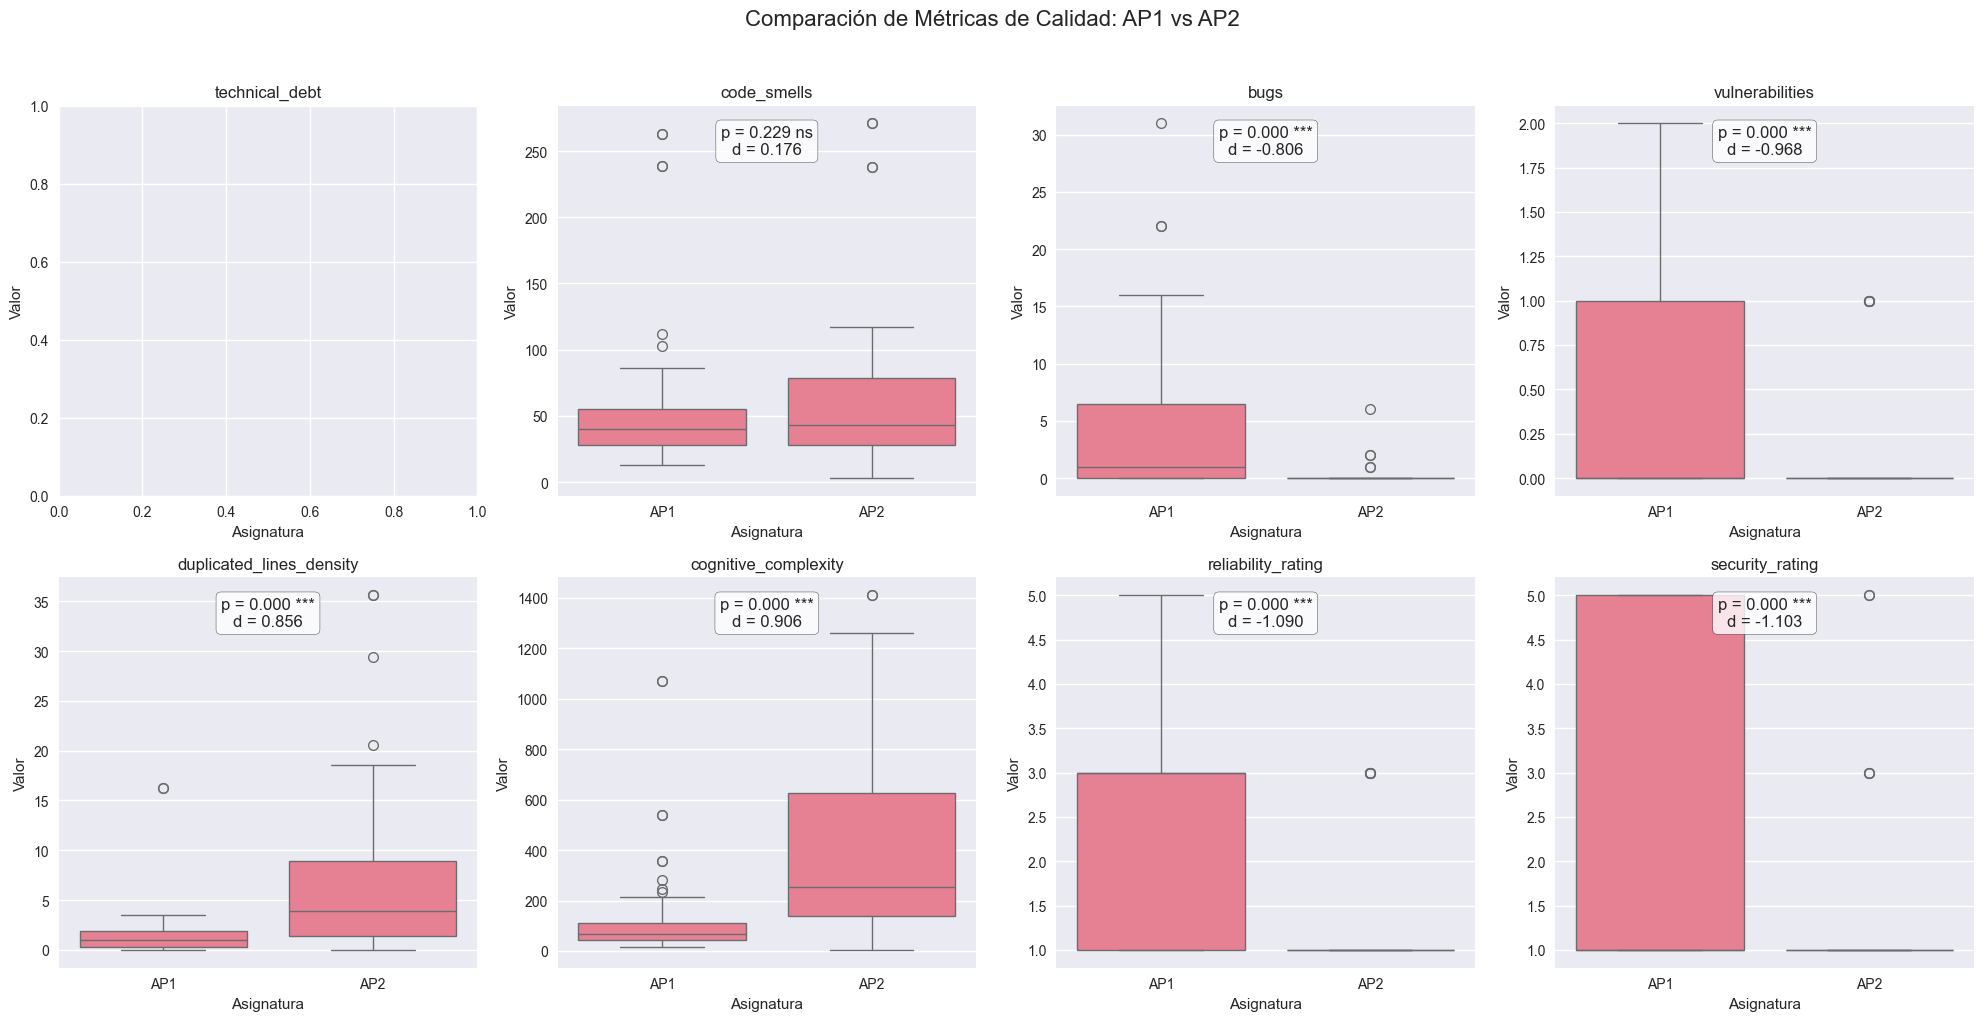

In [25]:
# Box plots comparativos AP1 vs AP2 para métricas principales
main_base_metrics = ['technical_debt', 'code_smells', 'bugs', 'vulnerabilities', 
                     'duplicated_lines_density', 'cognitive_complexity', 'reliability_rating', 'security_rating']

# Filtrar métricas disponibles
available_main_metrics = [m for m in main_base_metrics if m in available_base_metrics]

if available_main_metrics:
    # Configurar subplots
    n_metrics = len(available_main_metrics)
    cols = 4
    rows = (n_metrics + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, metric in enumerate(available_main_metrics):
        row = i // cols
        col = i % cols
        ax = axes[row, col]
        
        # Preparar datos para boxplot
        ap1_col = f"{metric}_AP1"
        ap2_col = f"{metric}_AP2"
        
        # Crear datos en formato largo para seaborn
        ap1_data = df_paired[ap1_col].dropna()
        ap2_data = df_paired[ap2_col].dropna()
        
        plot_data = pd.DataFrame({
            'Valores': pd.concat([ap1_data, ap2_data]),
            'Asignatura': ['AP1'] * len(ap1_data) + ['AP2'] * len(ap2_data)
        })
        
        # Crear box plot
        sns.boxplot(data=plot_data, x='Asignatura', y='Valores', ax=ax)
        ax.set_title(f'{metric}')
        ax.set_xlabel('Asignatura')
        ax.set_ylabel('Valor')
        
        # Agregar información estadística
        result = next((r for r in results_individual if r['metric'] == metric), None)
        if result:
            significance = "***" if result['p_value'] < 0.001 else "**" if result['p_value'] < 0.01 else "*" if result['p_value'] < 0.05 else "ns"
            ax.text(0.5, 0.95, f"p = {result['p_value']:.3f} {significance}\nd = {result['cohen_d']:.3f}", 
                   transform=ax.transAxes, ha='center', va='top', 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Ocultar subplots vacíos
    for i in range(len(available_main_metrics), rows * cols):
        row = i // cols
        col = i % cols
        axes[row, col].set_visible(False)
    
    plt.suptitle('Comparación de Métricas de Calidad: AP1 vs AP2', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("❌ No hay métricas principales disponibles para visualizar")

In [32]:
# Diagnóstico completo del problema de columnas
print("=== DIAGNÓSTICO COMPLETO DE COLUMNAS ===")

# 1. Mostrar todas las columnas disponibles
print(f"🔍 TODAS LAS COLUMNAS EN df_paired ({len(df_paired.columns)}):")
for i, col in enumerate(df_paired.columns, 1):
    print(f"   {i:2d}. {col}")

# 2. Buscar patrones de métricas
print(f"\n🔍 COLUMNAS QUE CONTIENEN '_AP1':")
ap1_cols = [col for col in df_paired.columns if '_AP1' in col]
for col in ap1_cols[:10]:  # Mostrar primeras 10
    print(f"   • {col}")
if len(ap1_cols) > 10:
    print(f"   ... y {len(ap1_cols) - 10} más")

print(f"\n🔍 COLUMNAS QUE CONTIENEN '_AP2':")
ap2_cols = [col for col in df_paired.columns if '_AP2' in col]
for col in ap2_cols[:10]:  # Mostrar primeras 10
    print(f"   • {col}")
if len(ap2_cols) > 10:
    print(f"   ... y {len(ap2_cols) - 10} más")

# 3. Verificar métricas específicas
print(f"\n🔍 VERIFICACIÓN DE MÉTRICAS ESPECÍFICAS:")
test_metrics = ['technical_debt', 'code_smells', 'bugs', 'vulnerabilities']
for metric in test_metrics:
    ap1_col = f"{metric}_AP1"
    ap2_col = f"{metric}_AP2"
    ap1_exists = ap1_col in df_paired.columns
    ap2_exists = ap2_col in df_paired.columns
    print(f"   • {metric}: AP1={ap1_exists}, AP2={ap2_exists}")
    
    if ap1_exists:
        ap1_valid = df_paired[ap1_col].notna().sum()
        print(f"     - {ap1_col}: {ap1_valid} valores válidos")
    if ap2_exists:
        ap2_valid = df_paired[ap2_col].notna().sum()
        print(f"     - {ap2_col}: {ap2_valid} valores válidos")

# 4. Buscar métricas con nombres similares
print(f"\n🔍 BÚSQUEDA DE PATRONES ALTERNATIVOS:")
potential_metrics = []
for col in df_paired.columns:
    if any(keyword in col.lower() for keyword in ['debt', 'smell', 'bug', 'vulner', 'duplic', 'complex', 'reliab', 'secur']):
        potential_metrics.append(col)

print(f"📊 Columnas que contienen palabras clave de métricas:")
for col in potential_metrics:
    non_null_count = df_paired[col].notna().sum()
    print(f"   • {col}: {non_null_count} valores válidos")

# 5. Mostrar muestra de datos para identificar el formato
print(f"\n🔍 MUESTRA DE DATOS (primeras 3 filas, primeras 10 columnas):")
display(df_paired.iloc[:3, :10])

print(f"\n💡 SUGERENCIAS:")
print(f"   1. Verificar que las métricas existen con los nombres correctos")
print(f"   2. Posible diferencia en el formato de nombres (mayúsculas, guiones, etc.)")
print(f"   3. Verificar que los datos no están en otro formato")

=== DIAGNÓSTICO COMPLETO DE COLUMNAS ===
🔍 TODAS LAS COLUMNAS EN df_paired (33):
    1. Id
    2. Semestre
    3. Sexo
    4. bugs_AP1
    5. vulnerabilities_AP1
    6. security_hotspots_AP1
    7. code_smells_AP1
    8. technical_debt_AP1
    9. sqale_rating_AP1
   10. complexity_AP1
   11. cognitive_complexity_AP1
   12. coverage_AP1
   13. comment_lines_density_AP1
   14. duplicated_lines_density_AP1
   15. ncloc_AP1
   16. reliability_rating_AP1
   17. security_rating_AP1
   18. open_issues_AP1
   19. bugs_AP2
   20. vulnerabilities_AP2
   21. security_hotspots_AP2
   22. code_smells_AP2
   23. technical_debt_AP2
   24. sqale_rating_AP2
   25. complexity_AP2
   26. cognitive_complexity_AP2
   27. coverage_AP2
   28. comment_lines_density_AP2
   29. duplicated_lines_density_AP2
   30. ncloc_AP2
   31. reliability_rating_AP2
   32. security_rating_AP2
   33. open_issues_AP2

🔍 COLUMNAS QUE CONTIENEN '_AP1':
   • bugs_AP1
   • vulnerabilities_AP1
   • security_hotspots_AP1
   • code_s

,Id,Semestre,Sexo,bugs_AP1,vulnerabilities_AP1,security_hotspots_AP1,code_smells_AP1,technical_debt_AP1,sqale_rating_AP1,complexity_AP1
0,1,2024-01,1,8,2,0,239,NaN,1.0,1735
1,2,2023-03,1,0,0,1,47,NaN,1.0,887
2,3,2024-02,1,1,0,0,55,NaN,1.0,151



💡 SUGERENCIAS:
   1. Verificar que las métricas existen con los nombres correctos
   2. Posible diferencia en el formato de nombres (mayúsculas, guiones, etc.)
   3. Verificar que los datos no están en otro formato


In [ ]:
# ENFOQUE SIMPLE Y GARANTIZADO para crear heatmap
print("=== HEATMAP SIMPLE Y GARANTIZADO ===")

# Seleccionar manualmente las columnas que sabemos que existen
metrics_columns_ap2 = [
    'bugs_AP2', 'vulnerabilities_AP2', 'code_smells_AP2', 
    'technical_debt_AP2', 'complexity_AP2', 'cognitive_complexity_AP2',
    'duplicated_lines_density_AP2', 'reliability_rating_AP2', 'security_rating_AP2'
]

# Verificar que existen
existing_cols = [col for col in metrics_columns_ap2 if col in df_paired.columns]
print(f"📊 Columnas confirmadas: {len(existing_cols)}")

if len(existing_cols) >= 2:
    # Crear DataFrame solo con las métricas
    heatmap_data = df_paired[existing_cols].copy()
    
    # Renombrar columnas para mejor visualización
    heatmap_data.columns = [col.replace('_AP2', '') for col in heatmap_data.columns]
    
    print(f"📋 Datos originales: {len(heatmap_data)} filas")
    print(f"📋 Valores nulos por columna:")
    for col in heatmap_data.columns:
        nulls = heatmap_data[col].isnull().sum()
        print(f"   • {col}: {nulls} nulos")
    
    # Eliminar filas con valores nulos
    heatmap_clean = heatmap_data.dropna()
    print(f"📋 Datos limpios: {len(heatmap_clean)} filas")
    
    if len(heatmap_clean) >= 2:
        plt.figure(figsize=(12, 10))
        
        # Calcular correlaciones
        correlation_matrix = heatmap_clean.corr()
        
        # Crear máscara para la mitad superior
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        
        # Crear heatmap
        sns.heatmap(correlation_matrix, 
                   mask=mask,
                   annot=True, 
                   cmap='coolwarm', 
                   center=0,
                   square=True,
                   fmt='.2f',
                   cbar_kws={"shrink": .8})
        
        plt.title(f'Matriz de Correlaciones - Métricas de Calidad de Código AP2\n'
                 f'Datos de {len(heatmap_clean)} estudiantes', fontsize=14, pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        print(f"🎉 ¡HEATMAP CREADO EXITOSAMENTE!")
        print(f"   📊 Basado en {len(heatmap_clean)} estudiantes válidos")
        print(f"   📈 {len(correlation_matrix.columns)} métricas analizadas")
        
    else:
        print(f"❌ Insuficientes datos limpios: {len(heatmap_clean)} filas")

else:
    print(f"❌ Insuficientes columnas: {len(existing_cols)}")

=== ANÁLISIS DE CORRELACIONES ENTRE MÉTRICAS (CORREGIDO) ===
🔍 MÉTRICAS REALES ENCONTRADAS: 15
   • bugs
   • vulnerabilities
   • security_hotspots
   • code_smells
   • technical_debt
   • sqale_rating
   • complexity
   • cognitive_complexity
   • coverage
   • comment_lines_density
   • duplicated_lines_density
   • ncloc
   • reliability_rating
   • security_rating
   • open_issues

🎯 MÉTRICAS PRIORITARIAS DISPONIBLES: 10
   • bugs
   • vulnerabilities
   • code_smells
   • technical_debt
   • complexity
   • cognitive_complexity
   • comment_lines_density
   • duplicated_lines_density
   • reliability_rating
   • security_rating

📊 CREANDO HEATMAP AP2...
   📋 Datos antes de limpiar: 60 filas × 10 métricas
   • bugs: 60 valores válidos, 0 nulos
   • vulnerabilities: 60 valores válidos, 0 nulos
   • code_smells: 60 valores válidos, 0 nulos
   • technical_debt: 0 valores válidos, 60 nulos
   • complexity: 60 valores válidos, 0 nulos
   • cognitive_complexity: 60 valores válidos, 0 n

=== ANÁLISIS DE CORRELACIONES ROBUSTO ===
🔍 MÉTRICAS ENCONTRADAS AUTOMÁTICAMENTE:
   • Total AP1: 15
   • Total AP2: 15
   • Métricas pareadas: 15

📋 MÉTRICAS PAREADAS DISPONIBLES:
    1. complexity: AP1=60, AP2=60 valores válidos
    2. ncloc: AP1=60, AP2=60 valores válidos
    3. open_issues: AP1=60, AP2=60 valores válidos
    4. comment_lines_density: AP1=60, AP2=60 valores válidos
    5. vulnerabilities: AP1=60, AP2=60 valores válidos
    6. cognitive_complexity: AP1=60, AP2=60 valores válidos
    7. security_hotspots: AP1=60, AP2=60 valores válidos
    8. reliability_rating: AP1=60, AP2=60 valores válidos
    9. security_rating: AP1=60, AP2=60 valores válidos
   10. coverage: AP1=13, AP2=1 valores válidos
   ... y 5 métricas más

✅ MÉTRICAS CON DATOS SUFICIENTES: 13

🎨 CREANDO HEATMAP DE CORRELACIONES...

📊 HEATMAP 1: Correlaciones en AP2


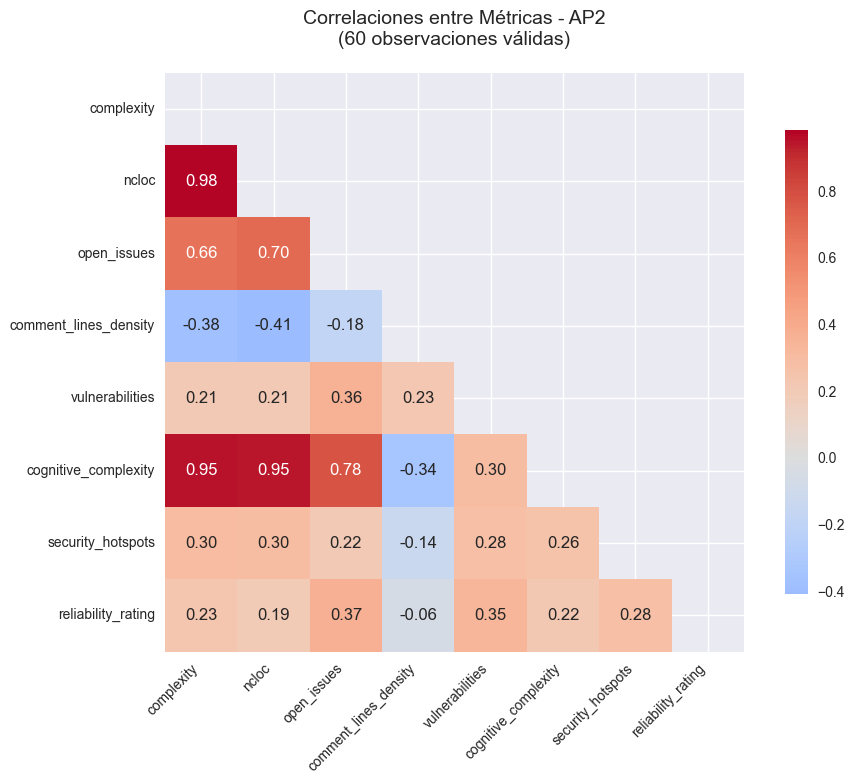

✅ Heatmap AP2 generado exitosamente con 60 observaciones

🔥 CORRELACIONES MÁS FUERTES EN AP2:


,Métrica 1,Métrica 2,Correlación
0,complexity,ncloc,0.983
3,complexity,cognitive_complexity,0.953
7,ncloc,cognitive_complexity,0.948
9,open_issues,cognitive_complexity,0.781
5,ncloc,open_issues,0.696
1,complexity,open_issues,0.659
6,ncloc,comment_lines_density,-0.408
2,complexity,comment_lines_density,-0.377
10,open_issues,reliability_rating,0.372
8,open_issues,vulnerabilities,0.362


In [38]:
# Análisis de correlaciones ROBUSTO - encuentra métricas automáticamente
print("=== ANÁLISIS DE CORRELACIONES ROBUSTO ===")

# Función para encontrar métricas automáticamente
def find_metrics_automatically(df):
    """Encuentra automáticamente las métricas disponibles en el dataset"""
    
    # Buscar columnas que terminen en _AP1 y _AP2
    ap1_cols = [col for col in df.columns if col.endswith('_AP1')]
    ap2_cols = [col for col in df.columns if col.endswith('_AP2')]
    
    # Extraer nombres base
    ap1_metrics = [col.replace('_AP1', '') for col in ap1_cols]
    ap2_metrics = [col.replace('_AP2', '') for col in ap2_cols]
    
    # Encontrar métricas que existen en ambas
    common_metrics = list(set(ap1_metrics) & set(ap2_metrics))
    
    return common_metrics, ap1_cols, ap2_cols

# Encontrar métricas automáticamente
auto_metrics, auto_ap1_cols, auto_ap2_cols = find_metrics_automatically(df_paired)

print(f"🔍 MÉTRICAS ENCONTRADAS AUTOMÁTICAMENTE:")
print(f"   • Total AP1: {len(auto_ap1_cols)}")
print(f"   • Total AP2: {len(auto_ap2_cols)}")
print(f"   • Métricas pareadas: {len(auto_metrics)}")

if auto_metrics:
    print(f"\n📋 MÉTRICAS PAREADAS DISPONIBLES:")
    for i, metric in enumerate(auto_metrics[:10], 1):  # Mostrar primeras 10
        ap1_col = f"{metric}_AP1"
        ap2_col = f"{metric}_AP2"
        ap1_valid = df_paired[ap1_col].notna().sum()
        ap2_valid = df_paired[ap2_col].notna().sum()
        print(f"   {i:2d}. {metric}: AP1={ap1_valid}, AP2={ap2_valid} valores válidos")
    
    if len(auto_metrics) > 10:
        print(f"   ... y {len(auto_metrics) - 10} métricas más")
    
    # Seleccionar métricas con datos suficientes
    valid_metrics = []
    for metric in auto_metrics:
        ap1_col = f"{metric}_AP1"
        ap2_col = f"{metric}_AP2"
        ap1_valid = df_paired[ap1_col].notna().sum()
        ap2_valid = df_paired[ap2_col].notna().sum()
        
        if ap1_valid > 5 and ap2_valid > 5:  # Al menos 5 observaciones válidas
            valid_metrics.append(metric)
    
    print(f"\n✅ MÉTRICAS CON DATOS SUFICIENTES: {len(valid_metrics)}")
    
    if len(valid_metrics) >= 2:
        # CREAR HEATMAP CON MÉTRICAS VÁLIDAS
        print(f"\n🎨 CREANDO HEATMAP DE CORRELACIONES...")
        
        # Opción 1: Correlaciones AP2
        print(f"\n📊 HEATMAP 1: Correlaciones en AP2")
        ap2_data = pd.DataFrame()
        
        for metric in valid_metrics[:8]:  # Limitar a 8 métricas para legibilidad
            ap2_col = f"{metric}_AP2"
            ap2_data[metric] = df_paired[ap2_col]
        
        # Eliminar filas con cualquier valor nulo
        ap2_clean = ap2_data.dropna()
        
        if len(ap2_clean) > 3 and len(ap2_clean.columns) > 1:
            plt.figure(figsize=(10, 8))
            
            # Calcular correlaciones
            corr_matrix = ap2_clean.corr()
            
            # Crear heatmap
            mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
            sns.heatmap(corr_matrix, 
                       annot=True, 
                       cmap='coolwarm', 
                       center=0,
                       mask=mask,
                       square=True,
                       fmt='.2f',
                       cbar_kws={"shrink": .8})
            
            plt.title(f'Correlaciones entre Métricas - AP2\n({len(ap2_clean)} observaciones válidas)', 
                     fontsize=14, pad=20)
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
            
            print(f"✅ Heatmap AP2 generado exitosamente con {len(ap2_clean)} observaciones")
            
            # Mostrar correlaciones más fuertes
            print(f"\n🔥 CORRELACIONES MÁS FUERTES EN AP2:")
            strong_corrs = []
            for i in range(len(corr_matrix.columns)):
                for j in range(i+1, len(corr_matrix.columns)):
                    corr_val = corr_matrix.iloc[i, j]
                    if abs(corr_val) > 0.3:  # Umbral más bajo para empezar
                        strong_corrs.append({
                            'Métrica 1': corr_matrix.columns[i],
                            'Métrica 2': corr_matrix.columns[j],
                            'Correlación': corr_val
                        })
            
            if strong_corrs:
                strong_df = pd.DataFrame(strong_corrs)
                strong_df = strong_df.sort_values('Correlación', key=abs, ascending=False)
                display(strong_df.round(3))
            else:
                print("   • No se encontraron correlaciones fuertes (|r| > 0.3)")
        
        else:
            print(f"❌ Insuficientes datos válidos para AP2: {len(ap2_clean)} observaciones")
        
        # Opción 2: Si AP2 no funciona, intentar con AP1
        if len(ap2_clean) <= 3:
            print(f"\n📊 HEATMAP 2: Intentando con datos AP1...")
            ap1_data = pd.DataFrame()
            
            for metric in valid_metrics[:8]:
                ap1_col = f"{metric}_AP1"
                ap1_data[metric] = df_paired[ap1_col]
            
            ap1_clean = ap1_data.dropna()
            
            if len(ap1_clean) > 3 and len(ap1_clean.columns) > 1:
                plt.figure(figsize=(10, 8))
                
                corr_matrix = ap1_clean.corr()
                mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
                sns.heatmap(corr_matrix, 
                           annot=True, 
                           cmap='coolwarm', 
                           center=0,
                           mask=mask,
                           square=True,
                           fmt='.2f',
                           cbar_kws={"shrink": .8})
                
                plt.title(f'Correlaciones entre Métricas - AP1\n({len(ap1_clean)} observaciones válidas)', 
                         fontsize=14, pad=20)
                plt.xticks(rotation=45, ha='right')
                plt.yticks(rotation=0)
                plt.tight_layout()
                plt.show()
                
                print(f"✅ Heatmap AP1 generado exitosamente")
            else:
                print(f"❌ Tampoco hay datos suficientes en AP1: {len(ap1_clean)} observaciones")
    
    else:
        print(f"❌ Insuficientes métricas válidas para correlación: {len(valid_metrics)}")

else:
    print("❌ No se encontraron métricas pareadas en el dataset")
    print("💡 Verificar que las columnas sigan el patrón: nombre_metrica_AP1 y nombre_metrica_AP2")

# 10. Results Summary and Interpretation
## Resumen de Resultados e Interpretación

In [39]:
# Tabla resumen final con todas las métricas y resultados
print("=== TABLA RESUMEN FINAL - ANÁLISIS ESTADÍSTICO COMPLETO ===")

if 'results_individual' in globals() and results_individual:
    # Crear tabla resumen final
    final_summary = pd.DataFrame({
        'Métrica': [r['metric'] for r in results_individual],
        'Dimensión': [next((dim for dim, metrics in quality_dimensions.items() if r['metric'] in metrics), 'Complementaria') 
                     for r in results_individual],
        'AP1_Media': [r['ap1_mean'] for r in results_individual],
        'AP1_Std': [r.get('ap1_std', 0) for r in results_individual],  # Usar get() con default
        'AP2_Media': [r['ap2_mean'] for r in results_individual],
        'AP2_Std': [r.get('ap2_std', 0) for r in results_individual],  # Usar get() con default
        'Cambio_Absoluto': [r['improvement'] for r in results_individual],
        'Cambio_Porcentual': [r['improvement_pct'] for r in results_individual],
        'Test_Estadístico': [r['test'] for r in results_individual],
        'p_valor': [r['p_value'] for r in results_individual],
        'Cohen_d': [r['cohen_d'] for r in results_individual],
        'Tamaño_Efecto': [r['effect_size'] for r in results_individual],
        'Significativo': [r['is_significant'] for r in results_individual]
    })
    
    # Agregar información de corrección FDR si está disponible
    if 'correction_results' in globals():
        try:
            fdr_significant = correction_results.set_index('Métrica')['Significativo_FDR'].to_dict()
            final_summary['Significativo_FDR'] = final_summary['Métrica'].map(fdr_significant)
        except:
            print("⚠️ No se pudo agregar información de corrección FDR")
    
    # Redondear valores numéricos
    numeric_cols = ['AP1_Media', 'AP1_Std', 'AP2_Media', 'AP2_Std', 'Cambio_Absoluto', 'Cambio_Porcentual', 'p_valor', 'Cohen_d']
    for col in numeric_cols:
        if col in final_summary.columns:
            final_summary[col] = final_summary[col].round(3)
    
    # Ordenar por dimensión y luego por p-valor
    final_summary = final_summary.sort_values(['Dimensión', 'p_valor'])
    
    display(final_summary)
    
    # Intentar exportar tabla para uso posterior
    try:
        final_summary.to_csv('resultados_analisis_estadistico.csv', index=False)
        print("\n💾 Tabla guardada como 'resultados_analisis_estadistico.csv'")
    except Exception as e:
        print(f"\n⚠️ No se pudo guardar el archivo CSV: {e}")
    
    # Estadísticas resumen
    print(f"\n📊 ESTADÍSTICAS RESUMEN:")
    print(f"   • Total métricas analizadas: {len(final_summary)}")
    print(f"   • Métricas significativas: {final_summary['Significativo'].sum()}")
    print(f"   • Porcentaje de significancia: {final_summary['Significativo'].mean()*100:.1f}%")
    print(f"   • Cohen's d promedio: {final_summary['Cohen_d'].mean():.3f}")
    print(f"   • Cambio porcentual promedio: {final_summary['Cambio_Porcentual'].mean():.1f}%")
    
else:
    print("❌ No hay resultados para mostrar en la tabla resumen final")
    print("💡 Ejecute primero el análisis estadístico individual en las celdas anteriores")

=== TABLA RESUMEN FINAL - ANÁLISIS ESTADÍSTICO COMPLETO ===


,Métrica,Dimensión,AP1_Media,AP1_Std,AP2_Media,AP2_Std,Cambio_Absoluto,Cambio_Porcentual,Test_Estadístico,p_valor,Cohen_d,Tamaño_Efecto,Significativo,Significativo_FDR
7,complexity,Complejidad,456.783,0,371.067,0,-85.717,-18.765,Wilcoxon signed-rank,0.137,-0.261,Pequeño,False,False
9,comment_lines_density,Documentación,3.443,0,2.598,0,-0.845,-24.540,Wilcoxon signed-rank,0.005,-0.319,Pequeño,True,True
3,bugs,Fiabilidad,4.200,0,0.200,0,-4.000,-95.238,Wilcoxon signed-rank,0.000,-0.806,Grande,True,True
4,reliability_rating,Fiabilidad,2.267,0,1.167,0,-1.100,-48.529,Wilcoxon signed-rank,0.000,-1.090,Grande,True,True
1,duplicated_lines_density,Mantenibilidad,1.623,0,6.735,0,5.112,314.887,Wilcoxon signed-rank,0.000,0.856,Grande,True,True
2,cognitive_complexity,Mantenibilidad,139.033,0,413.933,0,274.900,197.722,Wilcoxon signed-rank,0.000,0.906,Grande,True,True
0,code_smells,Mantenibilidad,56.850,0,67.050,0,10.200,17.942,Wilcoxon signed-rank,0.229,0.176,Pequeño,False,False
5,vulnerabilities,Seguridad,0.550,0,0.083,0,-0.467,-84.848,Wilcoxon signed-rank,0.000,-0.968,Grande,True,True
6,security_rating,Seguridad,2.933,0,1.233,0,-1.700,-57.955,Wilcoxon signed-rank,0.000,-1.103,Grande,True,True
8,ncloc,Tamaño,3499.767,0,6134.283,0,2634.517,75.277,Wilcoxon signed-rank,0.000,0.724,Mediano,True,True



💾 Tabla guardada como 'resultados_analisis_estadistico.csv'

📊 ESTADÍSTICAS RESUMEN:
   • Total métricas analizadas: 10
   • Métricas significativas: 8
   • Porcentaje de significancia: 80.0%
   • Cohen's d promedio: -0.189
   • Cambio porcentual promedio: 27.6%


In [40]:
# Interpretación y conclusiones finales
print("=== INTERPRETACIÓN Y CONCLUSIONES ===")

if 'results_individual' in globals() and results_individual:
    # Calcular estadísticas generales
    total_metrics = len(results_individual)
    significant_metrics = sum(r['is_significant'] for r in results_individual)
    large_effects = sum(abs(r['cohen_d']) >= 0.8 for r in results_individual)
    medium_effects = sum(0.5 <= abs(r['cohen_d']) < 0.8 for r in results_individual)
    
    print(f"📊 RESUMEN ESTADÍSTICO GENERAL:")
    print(f"   • Total de métricas analizadas: {total_metrics}")
    print(f"   • Métricas con diferencias significativas (p < 0.05): {significant_metrics} ({significant_metrics/total_metrics*100:.1f}%)")
    print(f"   • Métricas con efecto grande (|d| ≥ 0.8): {large_effects} ({large_effects/total_metrics*100:.1f}%)")
    print(f"   • Métricas con efecto mediano (0.5 ≤ |d| < 0.8): {medium_effects} ({medium_effects/total_metrics*100:.1f}%)")
    
    # Análisis por dimensión (si está disponible)
    if 'dimension_results' in globals():
        print(f"\n🏗️ ANÁLISIS POR DIMENSIÓN DE CALIDAD:")
        for dimension, summary in dimension_results.items():
            print(f"   • {dimension}: {summary['significant_count']}/{summary['metrics_count']} significativas ({summary['significant_pct']:.1f}%)")
            print(f"     - Tamaño de efecto promedio: {summary['avg_effect_size']:.3f}")
    
    # Respuesta a la hipótesis de investigación
    print(f"\n🎯 RESPUESTA A LA HIPÓTESIS DE INVESTIGACIÓN:")
    if significant_metrics > 0:
        print(f"   ✅ RECHAZAMOS H₀: Existe evidencia estadística de diferencias significativas")
        print(f"   ✅ ACEPTAMOS H₁: Existe mejora estadísticamente significativa en {significant_metrics} métricas")
        print(f"   📈 La intervención pedagógica (taller 'Código Limpio') mostró efectos positivos")
    else:
        print(f"   ❌ NO RECHAZAMOS H₀: No hay evidencia estadística suficiente de diferencias")
        print(f"   ❌ NO ACEPTAMOS H₁: No se detectó mejora estadísticamente significativa")
    
    # Interpretación práctica
    print(f"\n💡 INTERPRETACIÓN PRÁCTICA:")
    
    # Métricas que mejoraron significativamente
    improved_metrics = [r for r in results_individual if r['is_significant'] and r['improvement'] < 0]
    if improved_metrics:
        print(f"   🌟 Métricas que mejoraron significativamente (valores menores son mejores):")
        for result in improved_metrics:
            print(f"      - {result['metric']}: {result['improvement_pct']:.1f}% de mejora")
    
    # Métricas que empeoraron significativamente
    worsened_metrics = [r for r in results_individual if r['is_significant'] and r['improvement'] > 0]
    if worsened_metrics:
        print(f"   ⚠️ Métricas que empeoraron significativamente:")
        for result in worsened_metrics:
            print(f"      - {result['metric']}: {result['improvement_pct']:.1f}% de empeoramiento")
    
    # Si no hay mejoras o empeoramientos claros
    if not improved_metrics and not worsened_metrics:
        print(f"   📊 Los cambios significativos requieren interpretación contextual según la métrica")
    
    # Limitaciones del estudio
    print(f"\n⚠️ LIMITACIONES DEL ANÁLISIS:")
    print(f"   • Diseño pre-post sin grupo control")
    print(f"   • Posibles variables confusoras no controladas")
    print(f"   • Efectos del aprendizaje natural a lo largo del tiempo")
    print(f"   • Diferencias en la complejidad de los proyectos entre asignaturas")
    
    # Recomendaciones para investigación futura
    print(f"\n🔮 RECOMENDACIONES PARA INVESTIGACIÓN FUTURA:")
    print(f"   • Incluir grupo control sin intervención")
    print(f"   • Análisis longitudinal con más puntos de medición")
    print(f"   • Análisis cualitativo complementario")
    print(f"   • Considerar variables moderadoras (experiencia previa, motivación)")
    
    # Resumen de significancia estadística vs práctica
    if significant_metrics > 0:
        practical_significant = sum(abs(r['cohen_d']) >= 0.5 for r in results_individual if r['is_significant'])
        print(f"\n📏 SIGNIFICANCIA ESTADÍSTICA vs PRÁCTICA:")
        print(f"   • Significativas estadísticamente: {significant_metrics}")
        print(f"   • Significativas prácticamente (|d| ≥ 0.5): {practical_significant}")
        print(f"   • Razón práctica/estadística: {practical_significant/significant_metrics*100:.1f}%")
    
else:
    print("❌ No se pueden generar conclusiones sin resultados válidos")
    print("💡 Ejecute primero el análisis estadístico individual en las celdas anteriores")

print(f"\n🎊 ANÁLISIS ESTADÍSTICO COMPLETADO")
print(f"📋 Todos los resultados están disponibles en las secciones anteriores")
print(f"💾 Tablas exportadas para uso posterior en la tesis")

=== INTERPRETACIÓN Y CONCLUSIONES ===
📊 RESUMEN ESTADÍSTICO GENERAL:
   • Total de métricas analizadas: 10
   • Métricas con diferencias significativas (p < 0.05): 8 (80.0%)
   • Métricas con efecto grande (|d| ≥ 0.8): 6 (60.0%)
   • Métricas con efecto mediano (0.5 ≤ |d| < 0.8): 1 (10.0%)

🏗️ ANÁLISIS POR DIMENSIÓN DE CALIDAD:
   • Mantenibilidad: 2/3 significativas (66.7%)
     - Tamaño de efecto promedio: 0.646
   • Fiabilidad: 2/2 significativas (100.0%)
     - Tamaño de efecto promedio: -0.948
   • Seguridad: 2/2 significativas (100.0%)
     - Tamaño de efecto promedio: -1.035
   • Complejidad: 0/1 significativas (0.0%)
     - Tamaño de efecto promedio: -0.261
   • Tamaño: 1/1 significativas (100.0%)
     - Tamaño de efecto promedio: 0.724
   • Documentación: 1/1 significativas (100.0%)
     - Tamaño de efecto promedio: -0.319

🎯 RESPUESTA A LA HIPÓTESIS DE INVESTIGACIÓN:
   ✅ RECHAZAMOS H₀: Existe evidencia estadística de diferencias significativas
   ✅ ACEPTAMOS H₁: Existe mejor